Run all to do data preproccessing and create graphs

In [2]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("juhibhojani/house-price")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/juhibhojani/house-price/versions/1


# Data Preproccessing

In [3]:
df = pd.read_csv(f'{path}/house_prices.csv')

In [4]:
# @title fillsociety.py

import pandas as pd
import re

# Φορτώνει το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
# df = pd.read_csv('house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο
df = pd.read_csv(f'{path}/house_prices.csv')

# Συνάρτηση για την εξαγωγή του society name από το title
def extract_society_name(title):
    # Εξάγουμε το κείμενο μετά τη λέξη "sale" ή "sale in"
    match = re.search(r"(?:sale|sale in)\s*(.*)", title)
    if match:
        society_name = match.group(1).strip()  # Αφαιρούμε τα περιττά κενά
        # Αφαιρούμε τη λέξη "in" αν υπάρχει
        society_name = re.sub(r'\bin\b', '', society_name).strip()
        return society_name
    return None

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Title' και γεμίζουμε τη στήλη 'Society'
df['Society'] = df['Title'].apply(extract_society_name)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
#print(df[['Title', 'Society']].head())

In [5]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar Pokhran Road,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru Kolshet Road,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,Kasheli,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty Pokhran Road,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [6]:
# @title facing.py
import pandas as pd

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Βρίσκουμε όλες τις μοναδικές τιμές στην στήλη 'Facing' χωρίς τα NaN
unique_facing = df['facing'].dropna().unique()

# Δημιουργούμε μια αντιστοίχιση τύπου κατεύθυνσης -> αριθμός
facing_mapping = {facing: idx + 1 for idx, facing in enumerate(unique_facing)}

# Εμφανίζουμε την αντιστοίχιση
print(facing_mapping)

# Ενημερώνουμε τη στήλη 'Facing' με τους αριθμούς, διατηρώντας τα NaN ανέπαφα
df['facing'] = df['facing'].map(facing_mapping)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df[['facing']].head())

{'East': 1, 'West': 2, 'North - East': 3, 'North': 4, 'North - West': 5, 'South': 6, 'South -West': 7, 'South - East': 8}
   facing
0     NaN
1     1.0
2     1.0
3     NaN
4     2.0


In [7]:
df[['facing']].head()

,facing
0,NaN
1,1.0
2,1.0
3,NaN
4,2.0


In [8]:
# @title fixamount.py

import pandas as pd
import re
import numpy as np

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Συνάρτηση για να μετατρέψουμε τις τιμές από Lac ή Cr σε αριθμούς και να χειριστούμε την τιμή "Call for price"
def convert_amount(amount):
    # Αν η τιμή είναι "Call for price", επιστρέφουμε NaN
    if isinstance(amount, str) and "Call for Price" in amount:
        return np.nan

    # Έλεγχος για την περίπτωση "Lac" ή "Cr"
    match_lac = re.search(r'(\d+(\.\d+)?)\s*Lac', amount)
    match_cr = re.search(r'(\d+(\.\d+)?)\s*Cr', amount)

    if match_lac:
        return float(match_lac.group(1)) * 100000  # Μετατροπή από Lac σε αριθμό
    elif match_cr:
        return float(match_cr.group(1)) * 10000000  # Μετατροπή από Cr σε αριθμό
    return None

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Amount(in rupees)'
df['Amount(in rupees)'] = df['Amount(in rupees)'].apply(convert_amount)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
#print(df[['Amount(in rupees)']].head())


In [9]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,1.0,Garden/Park,Dosti Vihar Pokhran Road,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,1.0,Garden/Park,Sunrise by Kalpataru Kolshet Road,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,Kasheli,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,2.0,"Garden/Park, Main Road",TenX Habitat Raymond Realty Pokhran Road,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [10]:
# @title fixcarpetarea.py

import pandas as pd
import re

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Συνάρτηση για να εξάγουμε τον αριθμό από τη στήλη 'Carpet Area'
def extract_area(area):
    # Ελέγχουμε αν η τιμή είναι αλφαριθμητική
    if isinstance(area, str):
        # Εξάγουμε μόνο τον αριθμό από τη μορφή "xxx sqft"
        match = re.search(r'(\d+)', area)
        if match:
            return int(match.group(1))  # Επιστρέφουμε τον αριθμό ως ακέραιο
    return None

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Carpet Area'
df['Carpet Area'] = df['Carpet Area'].apply(extract_area)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
#print(df[['Carpet Area']].head())


In [11]:
df[df['Carpet Area'].isnull() == True]

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,4500000.0,6618.0,thane,NaN,Ready to Move,2 out of 7,Resale,...,1.0,"Garden/Park, Main Road",Virat Aangan Titwala,1,1,NaN,Co-operative Society,680 sqft,NaN,NaN
7,7,1 BHK Ready to Occupy Flat for sale Kalwa,Creatively planned and constructed is a 1 BHK ...,6000000.0,10435.0,thane,NaN,Ready to Move,Ground out of 7,Resale,...,NaN,NaN,Kalwa,1,NaN,NaN,NaN,575 sqft,NaN,NaN
8,8,1 BHK Ready to Occupy Flat for sale Kalwa,Discover this immaculate 1 BHK flat for sale a...,6000000.0,10000.0,thane,NaN,Ready to Move,Ground out of 2,Resale,...,NaN,NaN,Kalwa,1,NaN,NaN,Co-operative Society,600 sqft,NaN,NaN
11,11,2 BHK Ready to Occupy Flat for sale in Regency...,"2 BHK, Multistorey Apartment is available for ...",13600000.0,11674.0,thane,NaN,Ready to Move,16 out of 24,Resale,...,NaN,NaN,Regency Heights Kolshet Road,2,NaN,NaN,NaN,1165 sqft,NaN,NaN
12,12,2 BHK Ready to Occupy Flat for sale in Regency...,"2 BHK, Multistorey Apartment is available for ...",13500000.0,15995.0,thane,NaN,Ready to Move,8 out of 20,Resale,...,NaN,NaN,Regency Heights Kolshet Road,2,NaN,NaN,NaN,844 sqft,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187521,187521,4 BHK Ready to Occupy Flat for sale Nagla Road,"Nagla Road, Zirakpur has an appealing 4 BHK fl...",11800000.0,5816.0,zirakpur,NaN,Ready to Move,2 out of 11,Resale,...,NaN,"Garden/Park, Main Road",Nagla Road,4,4,NaN,Freehold,2029 sqft,NaN,NaN
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,6300000.0,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,1.0,Garden/Park,Bollywood Esencia Gazipur,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,5500000.0,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,3.0,"Garden/Park, Main Road",Sushma Urban Views ZIRAKPUR,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,3000000.0,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave Kishanpura,2,NaN,NaN,NaN,709 sqft,NaN,NaN


In [12]:
# @title furnishingtonumerical.py

import pandas as pd

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Βρίσκουμε όλες τις μοναδικές τιμές στην στήλη 'Furnishing' χωρίς τα NaN
unique_furnishing = df['Furnishing'].dropna().unique()

# Δημιουργούμε μια αντιστοίχιση τύπου επίπλωσης -> αριθμός
furnishing_mapping = {furnishing: idx + 1 for idx, furnishing in enumerate(unique_furnishing)}

# Εμφανίζουμε την αντιστοίχιση
print(furnishing_mapping)

# Ενημερώνουμε τη στήλη 'Furnishing' με τους αριθμούς, διατηρώντας τα NaN ανέπαφα
df['Furnishing'] = df['Furnishing'].map(furnishing_mapping)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df[['Furnishing']].head())

{'Unfurnished': 1, 'Semi-Furnished': 2, 'Furnished': 3}
   Furnishing
0         1.0
1         2.0
2         1.0
3         1.0
4         1.0


In [13]:
# @title locationtonumerical.py

import pandas as pd

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Βρίσκουμε όλες τις μοναδικές τοποθεσίες
unique_locations = df['location'].unique()

# Δημιουργούμε μια αντιστοίχιση τοποθεσίας -> αριθμός
location_mapping = {location: idx + 1 for idx, location in enumerate(unique_locations)}

# Εμφανίζουμε την αντιστοίχιση
print(location_mapping)

# Ενημερώνουμε τη στήλη 'location' με τους αριθμούς
df['location'] = df['location'].map(location_mapping)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df[['location']].head())


{'thane': 1, 'navi-mumbai': 2, 'nagpur': 3, 'mumbai': 4, 'ahmedabad': 5, 'bangalore': 6, 'chennai': 7, 'gurgaon': 8, 'hyderabad': 9, 'indore': 10, 'jaipur': 11, 'kolkata': 12, 'lucknow': 13, 'new-delhi': 14, 'noida': 15, 'pune': 16, 'agra': 17, 'ahmadnagar': 18, 'allahabad': 19, 'aurangabad': 20, 'badlapur': 21, 'belgaum': 22, 'bhiwadi': 23, 'bhiwandi': 24, 'bhopal': 25, 'bhubaneswar': 26, 'chandigarh': 27, 'coimbatore': 28, 'dehradun': 29, 'durgapur': 30, 'ernakulam': 31, 'faridabad': 32, 'ghaziabad': 33, 'goa': 34, 'greater-noida': 35, 'guntur': 36, 'guwahati': 37, 'gwalior': 38, 'haridwar': 39, 'jabalpur': 40, 'jamshedpur': 41, 'jodhpur': 42, 'kalyan': 43, 'kanpur': 44, 'kochi': 45, 'kozhikode': 46, 'ludhiana': 47, 'madurai': 48, 'mangalore': 49, 'mohali': 50, 'mysore': 51, 'nashik': 52, 'navsari': 53, 'nellore': 54, 'palakkad': 55, 'palghar': 56, 'panchkula': 57, 'patna': 58, 'pondicherry': 59, 'raipur': 60, 'rajahmundry': 61, 'ranchi': 62, 'satara': 63, 'shimla': 64, 'siliguri': 6

In [14]:
# @title ownershiptonumerical.py

import pandas as pd

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Βρίσκουμε όλες τις μοναδικές τιμές στην στήλη 'Ownership' χωρίς τα NaN
unique_ownership = df['Ownership'].dropna().unique()

# Δημιουργούμε μια αντιστοίχιση τύπου ιδιοκτησίας -> αριθμός
ownership_mapping = {ownership: idx + 1 for idx, ownership in enumerate(unique_ownership)}

# Εμφανίζουμε την αντιστοίχιση
print(ownership_mapping)

# Ενημερώνουμε τη στήλη 'Ownership' με τους αριθμούς, διατηρώντας τα NaN ανέπαφα
df['Ownership'] = df['Ownership'].map(ownership_mapping)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df[['Ownership']].head())

{'Freehold': 1, 'Co-operative Society': 2, 'Power Of Attorney': 3, 'Leasehold': 4}
   Ownership
0        NaN
1        1.0
2        1.0
3        NaN
4        2.0


In [15]:
# @title superareafix.py

import pandas as pd
import re

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Συνάρτηση για να αφαιρούμε τα κόμματα και τις τελείες και να μετατρέπουμε τις μονάδες σε sqft
def convert_super_area(area):
    # Εξασφαλίζουμε ότι η τιμή είναι σε μορφή string
    area = str(area).replace(',', '').replace('.', '')  # Αφαιρούμε κόμματα και τελείες

    # Αν η μονάδα είναι sqm, μετατρέπουμε σε sqft
    if 'sqm' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 10.7639  # sqm -> sqft
    # Αν η μονάδα είναι sqyrd, μετατρέπουμε σε sqft
    elif 'sqyrd' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 9  # sqyrd -> sqft
    # Αν η μονάδα είναι marla, μετατρέπουμε σε sqft
    elif 'marla' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 272.25  # marla -> sqft
    # Αν η μονάδα είναι kanal, μετατρέπουμε σε sqft
    elif 'kanal' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 5445  # kanal -> sqft
    # Αν η μονάδα είναι ground, μετατρέπουμε σε sqft
    elif 'ground' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 2400  # ground -> sqft
    # Αν η μονάδα είναι biswa, μετατρέπουμε σε sqft
    elif 'biswa' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 450  # biswa -> sqft
    # Αν η μονάδα είναι aankadam, μετατρέπουμε σε sqft (αν δεν γνωρίζουμε ακριβώς την αντιστοιχία, βάζουμε 1 ή τροποποιούμε αργότερα)
    elif 'aankadam' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 1  # Στην περίπτωση που δεν ξέρουμε την αντιστοιχία
    # Αν η μονάδα είναι acre, μετατρέπουμε σε sqft
    elif 'acre' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 43560  # acre -> sqft
    # Αν η μονάδα είναι hectare, μετατρέπουμε σε sqft
    elif 'hectare' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 107639.104  # hectare -> sqft
    # Αν η μονάδα είναι cent, μετατρέπουμε σε sqft
    elif 'cent' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))
        return area_value * 435.6  # cent -> sqft
    # Αν η μονάδα είναι ήδη sqft ή κάτι άλλο
    elif 'sqft' in area:
        area_value = float(re.sub(r'[^\d.]', '', area))  # Αφαιρούμε οποιαδήποτε μη αριθμητικά στοιχεία
        return area_value
    else:
        # Επιστρέφουμε τον αριθμό αν δεν υπάρχουν μονάδες
        return float(area)

# Εφαρμόζουμε τη συνάρτηση στην στήλη 'Super Area'
df['Super Area'] = df['Super Area'].apply(convert_super_area)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df[['Super Area']].head())


   Super Area
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN


In [16]:
# @title totalarea.py

import pandas as pd

# Φορτώνουμε το αρχείο CSV
df = pd.read_csv('updated_house_prices.csv')  # Ενημερώστε το μονοπάτι του αρχείου

# Ελέγχουμε τις πρώτες γραμμές του αρχείου για να δούμε τη δομή των δεδομένων
print("Πρώτες γραμμές του αρχείου:")
print(df.head())

# Μετατρέπουμε τις στήλες σε αριθμητικές τιμές (και τα NaN να παραμείνουν αν υπάρχουν)
df['Super Area'] = pd.to_numeric(df['Super Area'], errors='coerce')
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')

# Δημιουργούμε τη νέα στήλη "Total Area", υπολογίζοντας το Super Area και Carpet Area με NaN ως 0
df['Total Area'] = df['Super Area'].fillna(0) + df['Carpet Area'].fillna(0)

# Εξάγουμε το αρχείο με την νέα στήλη
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print("\nΠρώτες γραμμές με την νέα στήλη 'Total Area':")
print(df[['Super Area', 'Carpet Area', 'Total Area']].head())

Πρώτες γραμμές του αρχείου:
   Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   

                                         Description  Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...          4200000.0   
1  One can find this stunning 2 BHK flat for sale...          9800000.0   
2  Up for immediate sale is a 2 BHK apartment in ...         14000000.0   
3  This beautiful 1 BHK Flat is available for sal...          2500000.0   
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...         16000000.0   

   Price (in rupees)  location  Carpet Area         Status         Floor  \
0             6000.0         1        500.0  Ready to Move  10 out

In [17]:
# @title transactiontonumerical.py

import pandas as pd

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Βρίσκουμε όλες τις μοναδικές τιμές στην στήλη 'Transaction' χωρίς τα NaN
unique_transactions = df['Transaction'].dropna().unique()

# Δημιουργούμε μια αντιστοίχιση τύπου συναλλαγής -> αριθμός
transaction_mapping = {transaction: idx + 1 for idx, transaction in enumerate(unique_transactions)}

# Εμφανίζουμε την αντιστοίχιση
print(transaction_mapping)

# Ενημερώνουμε τη στήλη 'Transaction' με τους αριθμούς, διατηρώντας τα NaN ανέπαφα
df['Transaction'] = df['Transaction'].map(transaction_mapping)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df[['Transaction']].head())

{'Resale': 1, 'New Property': 2, 'Other': 3, 'Rent/Lease': 4}
   Transaction
0          1.0
1          1.0
2          1.0
3          1.0
4          1.0


In [18]:
# @title overlookingnumerical.py

import pandas as pd

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Δημιουργούμε μια συνάρτηση για να κανονικοποιήσουμε τις τιμές ταξινομώντας τα στοιχεία
def normalize_overlooking(overlooking_value):
    # Αν η τιμή είναι 'Not Available', την αφαιρούμε
    if isinstance(overlooking_value, str) and 'Not Available' in overlooking_value:
        overlooking_value = overlooking_value.replace('Not Available', '').strip(', ')  # Αφαιρούμε το 'Not Available'

    # Χωρίζουμε τη τιμή σε λίστα και τα ταξινομούμε
    return ', '.join(sorted(overlooking_value.split(', '))) if overlooking_value else None

# Εφαρμόζουμε την κανονικοποίηση απευθείας στη στήλη 'overlooking'
df['overlooking'] = df['overlooking'].apply(lambda x: normalize_overlooking(x) if isinstance(x, str) else x)

# Βρίσκουμε όλες τις μοναδικές τιμές στην στήλη 'overlooking' χωρίς τα NaN
unique_overlooking = df['overlooking'].dropna().unique()

# Δημιουργούμε μια αντιστοίχιση τύπου κατεύθυνσης -> αριθμός
overlooking_mapping = {overlooking: idx + 1 for idx, overlooking in enumerate(unique_overlooking)}

# Εμφανίζουμε την αντιστοίχιση
print(overlooking_mapping)

# Ενημερώνουμε τη στήλη 'overlooking' με τους αριθμούς, διατηρώντας τα NaN ανέπαφα
df['overlooking'] = df['overlooking'].map(overlooking_mapping)

# Εξάγουμε το αρχείο με τις επικαιροποιημένες τιμές.
df.to_csv('updated_house_prices.csv', index=False)

# Εμφανίζουμε τις πρώτες γραμμές για επιβεβαίωση
print(df[['overlooking']].head())

{'Garden/Park': 1, 'Garden/Park, Main Road': 2, 'Main Road': 3, 'Garden/Park, Main Road, Pool': 4, 'Garden/Park, Pool': 5, 'Pool': 6, 'Main Road, Pool': 7}
   overlooking
0          NaN
1          1.0
2          1.0
3          NaN
4          2.0


In [19]:
# @title replaceslash.py

import pandas as pd

# Φορτώνουμε το αρχείο CSV με τις τιμές που έχουν αποθηκευτεί.
df = pd.read_csv('updated_house_prices.csv')  # Προσαρμόστε το μονοπάτι του αρχείου αν είναι απαραίτητο

# Αντικαθιστούμε το "/" με ","
df['overlooking'] = df['overlooking'].replace({'/': ','}, regex=True)

# Αποθηκεύουμε το νέο αρχείο με τις αλλαγές σε μορφή CSV
df.to_csv('updated_house_prices_updated.csv', index=False)

print("Η αντικατάσταση ολοκληρώθηκε και το αρχείο αποθηκεύτηκε ως updated_house_prices_updated.csv.")

Η αντικατάσταση ολοκληρώθηκε και το αρχείο αποθηκεύτηκε ως updated_house_prices_updated.csv.


In [20]:
null_counts = df.isnull().sum()
print(null_counts)


Index                     0
Title                     0
Description            3023
Amount(in rupees)      9684
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society                   0
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
Total Area                0
dtype: int64


In [21]:
df.shape

(187531, 22)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  177847 non-null  float64
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  int64  
 6   Carpet Area        106858 non-null  float64
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  float64
 10  Furnishing         184634 non-null  float64
 11  facing             117298 non-null  float64
 12  overlooking        106095 non-null  float64
 13  Society            187531 non-null  object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),9684
Price (in rupees),17665
location,0
Carpet Area,80673
Status,615
Floor,7077
Transaction,83


In [26]:
# Drop columns with a high number of missing values REMEMBER TO DROP INDEX
df.drop(columns=['Car Parking', 'Dimensions', 'Plot Area','Super Area','Carpet Area'], inplace=True)

In [27]:
df.isnull().sum()

,0
Index,0
Title,0
Description,3023
Amount(in rupees),9684
Price (in rupees),17665
location,0
Status,615
Floor,7077
Transaction,83
Furnishing,2897


In [28]:
#Print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  177847 non-null  float64
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  int64  
 6   Status             186916 non-null  object 
 7   Floor              180454 non-null  object 
 8   Transaction        187448 non-null  float64
 9   Furnishing         184634 non-null  float64
 10  facing             117298 non-null  float64
 11  overlooking        106095 non-null  float64
 12  Society            187531 non-null  object 
 13  Bathroom           186703 non-null  object 
 14  Balcony            138596 non-null  object 
 15  Ownership          122014 non-null  float64
 16  To

In [29]:
df.nunique()

,0
Index,187531
Title,32446
Description,65634
Amount(in rupees),1559
Price (in rupees),10958
location,81
Status,1
Floor,947
Transaction,4
Furnishing,3


In [30]:
df.drop(columns=['Status'], inplace=True)

In [31]:
print("Summary Statistics")
df.describe()

Summary Statistics


,Index,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Ownership,Total Area
count,187531.000000,1.778470e+05,1.698660e+05,187531.000000,187448.000000,184634.000000,117298.000000,106095.000000,122014.000000,1.875310e+05
mean,93765.000000,1.198134e+07,7.583772e+03,17.498835,1.234673,1.696741,2.502455,2.600726,1.175586,8.671552e+03
std,54135.681003,3.943827e+07,2.724171e+04,18.294493,0.432702,0.655511,1.779267,1.233710,0.649746,2.940928e+06
min,0.000000,1.000000e+05,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,46882.500000,4.840000e+06,4.297000e+03,7.000000,1.000000,1.000000,1.000000,2.000000,1.000000,8.240000e+02
50%,93765.000000,7.800000e+06,6.034000e+03,12.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.150000e+03
75%,140647.500000,1.450000e+07,9.450000e+03,14.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.570000e+03
max,187530.000000,1.400300e+10,6.700000e+06,81.000000,4.000000,3.000000,8.000000,7.000000,4.000000,1.272096e+09


In [32]:
df.drop(columns=['Index'],inplace=True)

In [33]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

Title
Title
2 BHK Ready to Occupy Flat for sale in Divyasree Elan Sarjapur Road                2106
4 BHK Ready to Occupy Flat for sale in Hamdam Apartment Dwarka Sector 18           1647
2 BHK Ready to Occupy Flat for sale Nayabad                                        1295
3 BHK Ready to Occupy Flat for sale in Shree Vardhman Victoria Sector 70           1147
3 BHK Ready to Occupy Flat for sale Jagatpur                                        986
                                                                                   ... 
3 BHK Ready to Occupy Flat for sale in Savitry Greens ZIRAKPUR                        1
3 BHK Ready to Occupy Flat for sale Hollywood height 1 Zirakpur                       1
3 BHK Ready to Occupy Flat for sale Ishmita homes, Kishanpura, Dhakoli Zirakpur       1
3 BHK Ready to Occupy Flat for sale in Sushma Crescent Phase 2                        1
3 BHK Ready to Occupy Flat for sale in Motia Homes Ambala Highway                     1
Name: count, Length:

In [34]:
# 1. Fill null values in 'Description' with 'Unknown' and 'Facing', 'Overlooking', and 'Ownership' with 0
house_df = df.copy()
cols_to_fill_unknown = ['Description']
house_df[cols_to_fill_unknown] = house_df[cols_to_fill_unknown].fillna('Unknown')

cols_to_fill_zero = ['facing', 'overlooking', 'Ownership']
house_df[cols_to_fill_zero] = house_df[cols_to_fill_zero].fillna('0')
house_df['facing'] = house_df['facing'].astype(int)
house_df['overlooking'] = house_df['overlooking'].astype(int)
house_df['Ownership'] = house_df['Ownership'].astype(int)

# 2. Fill null values in 'Price (in rupees)' with mean value
mean_price = house_df['Price (in rupees)'].mean()
house_df['Price (in rupees)'] = house_df['Price (in rupees)'].fillna(mean_price)

# 2.1 Fill null values in 'Amount (in rupees)' with mean value
mean_amount = house_df['Amount(in rupees)'].mean()
house_df['Amount(in rupees)'] = house_df['Amount(in rupees)'].fillna(mean_amount)

# 3. Replace null values in 'Status', 'Transaction', and 'Furnishing' columns with mode (most common)
cols_to_fill_mode = ['Transaction', 'Furnishing']
for col in cols_to_fill_mode:
    mode_val = house_df[col].mode().iloc[0]
    house_df[col] = house_df[col].fillna(mode_val)

# Bathroom
# Αντικατάσταση τιμών '> 10' με 11
house_df.loc[house_df['Bathroom'] == '> 10', 'Bathroom'] = 11

# Μετατροπή της στήλης 'Bathroom' σε αριθμητική τιμή (int ή float)
house_df['Bathroom'] = pd.to_numeric(house_df['Bathroom'], errors='coerce')

# Τώρα μπορείς να υπολογίσεις τον μέσο όρο, καθώς η στήλη είναι αριθμητική
mean_bathroom = house_df['Bathroom'].mean()

# Γέμισμα των NaN τιμών με τον μέσο όρο
house_df['Bathroom'] = house_df['Bathroom'].fillna(mean_bathroom)

# Αν θέλεις, μπορείς να μετατρέψεις σε ακέραιο τύπο (int) αφού γίνουν οι τροποποιήσεις
house_df['Bathroom'] = house_df['Bathroom'].astype(int)

# Balcony
# Αντικατάσταση τιμών '> 10' με 11
house_df.loc[house_df['Balcony'] == '> 10', 'Balcony'] = 11

# Μετατροπή της στήλης 'Balcony' σε αριθμητική τιμή (int ή float)
house_df['Balcony'] = pd.to_numeric(house_df['Balcony'], errors='coerce')

# Τώρα μπορείς να υπολογίσεις τον μέσο όρο, καθώς η στήλη είναι αριθμητική
mean_balcony = house_df['Balcony'].mean()

# Γέμισμα των NaN τιμών με τον μέσο όρο
house_df['Balcony'] = house_df['Balcony'].fillna(mean_balcony)

# Αν θέλεις, μπορείς να μετατρέψεις σε ακέραιο τύπο (int) αφού γίνουν οι τροποποιήσεις
house_df['Balcony'] = house_df['Balcony'].astype(int)

# 4. Process the 'Floor' column: Split into current floor and maximum floor
def split_floor_column(floor):
    if isinstance(floor, str):  # Check if the floor value is a string
        # Handle 'Ground' separately by setting current floor to 0 and maximum floor to the number after 'out of'
        if "Ground" in floor:
            parts = floor.split(' out of ')
            return 0, int(parts[1].strip()) if len(parts) == 2 else None
        # Handle 'Upper Basement' by setting current floor to -1 and maximum floor to the number after 'out of'
        elif "Upper Basement" in floor:
            parts = floor.split(' out of ')
            return -1, int(parts[1].strip()) if len(parts) == 2 else None
        # Handle 'Lower Basement' by setting current floor to -2 and maximum floor to the number after 'out of'
        elif "Lower Basement" in floor:
            parts = floor.split(' out of ')
            return -2, int(parts[1].strip()) if len(parts) == 2 else None
        elif 'out of' in floor:  # Standard case with 'out of'
            parts = floor.split(' out of ')
            # Ensure both parts exist before converting
            if len(parts) == 2:
                try:
                    return int(parts[0].strip()), int(parts[1].strip())
                except ValueError:
                    return None, None  # In case the parts cannot be converted to integers
    return None, None  # Return None for non-string or malformed floor values

# Apply the function to split the 'Floor' column
house_df[['current floor', 'maximum floor']] = house_df['Floor'].apply(lambda x: pd.Series(split_floor_column(x)))

# Verify if all null values have been handled
print(house_df.isnull().sum())

Title                   0
Description             0
Amount(in rupees)       0
Price (in rupees)       0
location                0
Floor                7077
Transaction             0
Furnishing              0
facing                  0
overlooking             0
Society                 0
Bathroom                0
Balcony                 0
Ownership               0
Total Area              0
current floor        7121
maximum floor        7126
dtype: int64


In [35]:
# Fill null values in 'current floor' and 'maximum floor' with their mean
mean_current_floor = house_df['current floor'].mean()
mean_maximum_floor = house_df['maximum floor'].mean()

# Fill the NaN values in both columns with their respective means
house_df['current floor'] = house_df['current floor'].fillna(mean_current_floor)
house_df['maximum floor'] = house_df['maximum floor'].fillna(mean_maximum_floor)

# Verify if all null values have been handled
print(house_df.isnull().sum())

Title                   0
Description             0
Amount(in rupees)       0
Price (in rupees)       0
location                0
Floor                7077
Transaction             0
Furnishing              0
facing                  0
overlooking             0
Society                 0
Bathroom                0
Balcony                 0
Ownership               0
Total Area              0
current floor           0
maximum floor           0
dtype: int64


In [36]:
house_df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,1,10 out of 11,1.0,1.0,0,0,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,0,500.0,10.0,11.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,1,3 out of 22,1.0,2.0,1,1,Dosti Vihar Pokhran Road,2,2,1,473.0,3.0,22.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,1,10 out of 29,1.0,1.0,1,1,Sunrise by Kalpataru Kolshet Road,2,2,1,779.0,10.0,29.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,1,1 out of 3,1.0,1.0,0,0,Kasheli,1,1,0,530.0,1.0,3.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,1,20 out of 42,1.0,1.0,2,2,TenX Habitat Raymond Realty Pokhran Road,2,2,2,635.0,20.0,42.0


In [37]:
# Drop columns with a high number of missing values
house_df.drop(columns=['Floor'], inplace=True)

In [38]:
print(house_df.isnull().sum())

Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Ownership            0
Total Area           0
current floor        0
maximum floor        0
dtype: int64


In [39]:
house_df

,Title,Description,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,1,1.0,1.0,0,0,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,0,500.0,10.0,11.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,1,1.0,2.0,1,1,Dosti Vihar Pokhran Road,2,2,1,473.0,3.0,22.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,1,1.0,1.0,1,1,Sunrise by Kalpataru Kolshet Road,2,2,1,779.0,10.0,29.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,1,1.0,1.0,0,0,Kasheli,1,1,0,530.0,1.0,3.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,1,1.0,1.0,2,2,TenX Habitat Raymond Realty Pokhran Road,2,2,2,635.0,20.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,6300000.0,3225.000000,81,2.0,2.0,1,1,Bollywood Esencia Gazipur,3,3,1,1953.0,2.0,4.0
187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,5500000.0,3274.000000,81,1.0,1.0,3,2,Sushma Urban Views ZIRAKPUR,3,2,0,1680.0,4.0,6.0
187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",7600000.0,4343.000000,81,1.0,3.0,1,2,Bollywood Esencia Gazipur,3,2,1,1250.0,1.0,3.0
187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,3000000.0,4231.000000,81,1.0,2.0,0,3,Friends Enclave Kishanpura,2,2,0,709.0,2.0,2.0


In [40]:
house_df.duplicated().sum()

np.int64(119339)

In [41]:
house_df.drop_duplicates(inplace=True)

In [42]:
house_df.shape

(68192, 16)

In [43]:
df = house_df.copy()

In [44]:
df.head()

,Title,Description,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",4200000.0,6000.000000,1,1.0,1.0,0,0,Srushti Siddhi Mangal Murti Complex Bhiwandi,1,2,0,500.0,10.0,11.0
1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,9800000.0,13799.000000,1,1.0,2.0,1,1,Dosti Vihar Pokhran Road,2,2,1,473.0,3.0,22.0
2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,14000000.0,17500.000000,1,1.0,1.0,1,1,Sunrise by Kalpataru Kolshet Road,2,2,1,779.0,10.0,29.0
3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,2500000.0,7583.771885,1,1.0,1.0,0,0,Kasheli,1,1,0,530.0,1.0,3.0
4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",16000000.0,18824.000000,1,1.0,1.0,2,2,TenX Habitat Raymond Realty Pokhran Road,2,2,2,635.0,20.0,42.0


In [45]:
df[['Amount(in rupees)','Total Area']]

,Amount(in rupees),Total Area
0,4200000.0,500.0
1,9800000.0,473.0
2,14000000.0,779.0
3,2500000.0,530.0
4,16000000.0,635.0
...,...,...
187526,6300000.0,1953.0
187527,5500000.0,1680.0
187528,7600000.0,1250.0
187529,3000000.0,709.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68192 entries, 0 to 187530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              68192 non-null  object 
 1   Description        68192 non-null  object 
 2   Amount(in rupees)  68192 non-null  float64
 3   Price (in rupees)  68192 non-null  float64
 4   location           68192 non-null  int64  
 5   Transaction        68192 non-null  float64
 6   Furnishing         68192 non-null  float64
 7   facing             68192 non-null  int64  
 8   overlooking        68192 non-null  int64  
 9   Society            68192 non-null  object 
 10  Bathroom           68192 non-null  int64  
 11  Balcony            68192 non-null  int64  
 12  Ownership          68192 non-null  int64  
 13  Total Area         68192 non-null  float64
 14  current floor      68192 non-null  float64
 15  maximum floor      68192 non-null  float64
dtypes: float64(7), int64(6), o

In [47]:
df.describe()

,Amount(in rupees),Price (in rupees),location,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Total Area,current floor,maximum floor
count,6.819200e+04,6.819200e+04,68192.000000,68192.000000,68192.000000,68192.000000,68192.000000,68192.000000,68192.000000,68192.000000,6.819200e+04,68192.000000,68192.000000
mean,1.073518e+07,6.873709e+03,30.821460,1.257567,1.715216,1.538685,1.498988,2.408347,2.062720,0.818424,2.166856e+04,4.316393,8.531152
std,6.155574e+07,4.257985e+04,24.479552,0.439505,0.686353,1.886236,1.600573,0.897524,0.866681,0.894910,4.877012e+06,4.354228,6.827123
min,1.000000e+05,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,-2.000000,1.000000
25%,4.200000e+06,3.957750e+03,9.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,8.300000e+02,2.000000,4.000000
50%,6.600000e+06,5.357000e+03,26.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.130000e+03,3.000000,6.000000
75%,1.198134e+07,7.583772e+03,49.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000,1.515250e+03,5.000000,12.000000
max,1.400300e+10,6.700000e+06,81.000000,4.000000,3.000000,8.000000,7.000000,11.000000,11.000000,4.000000,1.272096e+09,200.000000,200.000000


# Graphs/Plots

Summary statistics for column Amount(in rupees)
count    6.819200e+04
mean     1.073518e+07
std      6.155574e+07
min      1.000000e+05
25%      4.200000e+06
50%      6.600000e+06
75%      1.198134e+07
max      1.400300e+10
Name: Amount(in rupees), dtype: float64


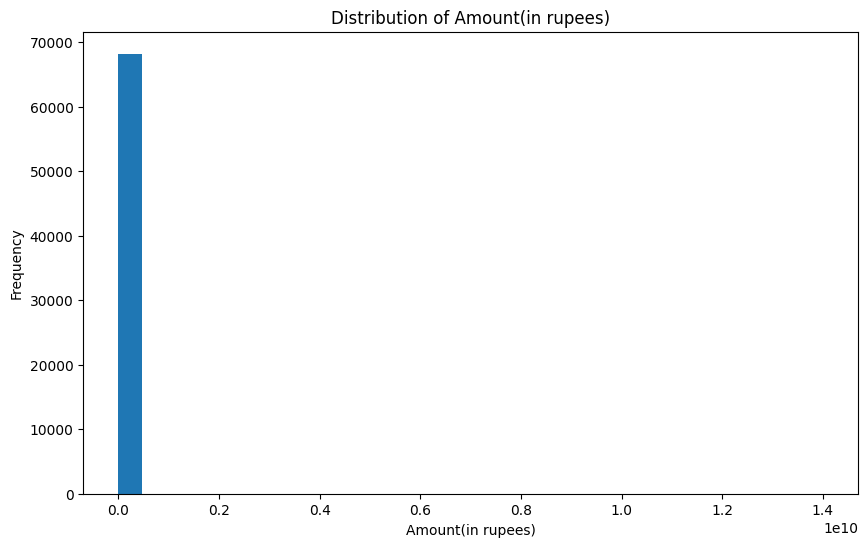

Summary statistics for column Price (in rupees)
count    6.819200e+04
mean     6.873709e+03
std      4.257985e+04
min      0.000000e+00
25%      3.957750e+03
50%      5.357000e+03
75%      7.583772e+03
max      6.700000e+06
Name: Price (in rupees), dtype: float64


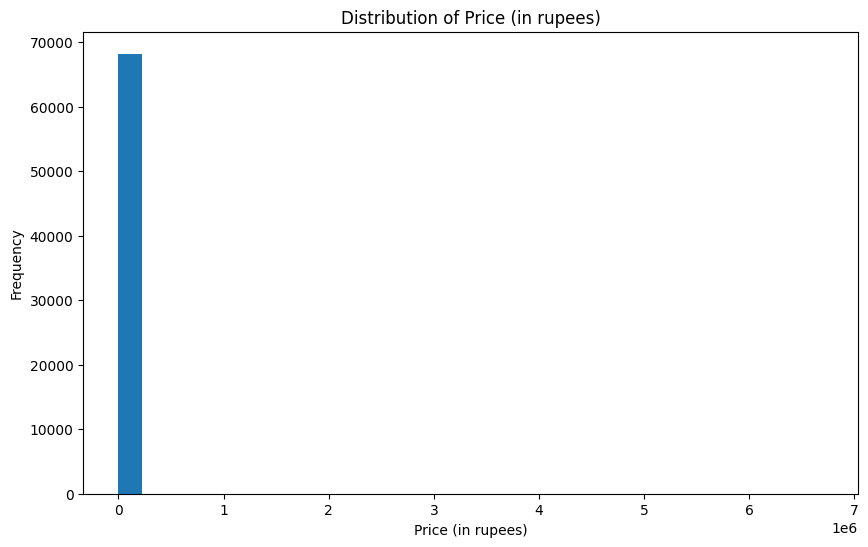

Summary statistics for column location
count    68192.000000
mean        30.821460
std         24.479552
min          1.000000
25%          9.000000
50%         26.000000
75%         49.000000
max         81.000000
Name: location, dtype: float64


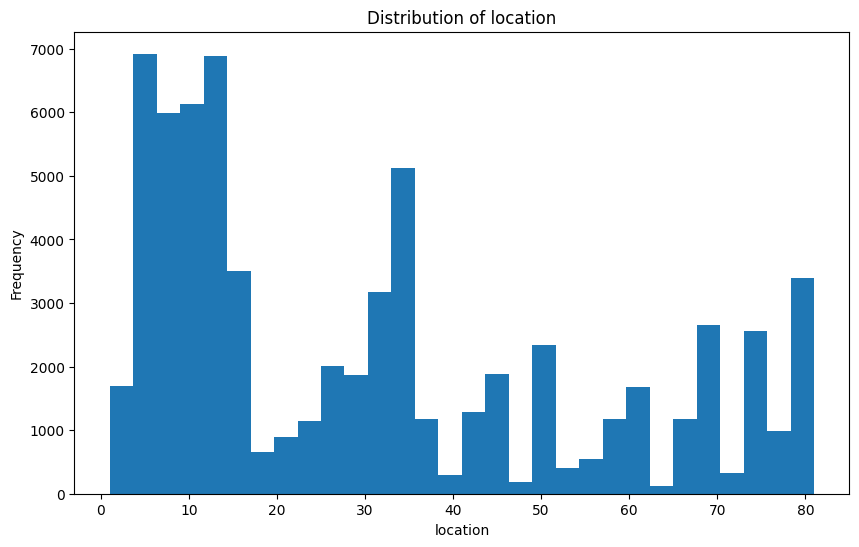

Summary statistics for column Transaction
count    68192.000000
mean         1.257567
std          0.439505
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: Transaction, dtype: float64


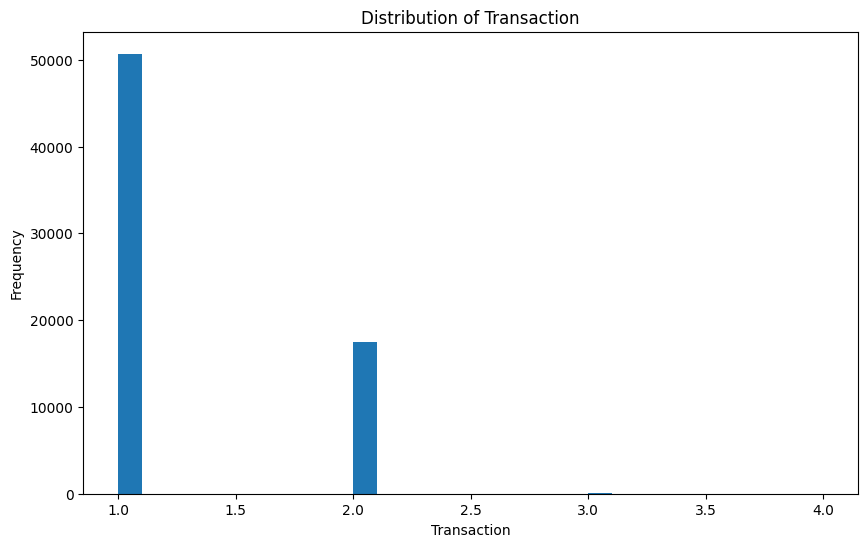

Summary statistics for column Furnishing
count    68192.000000
mean         1.715216
std          0.686353
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Furnishing, dtype: float64


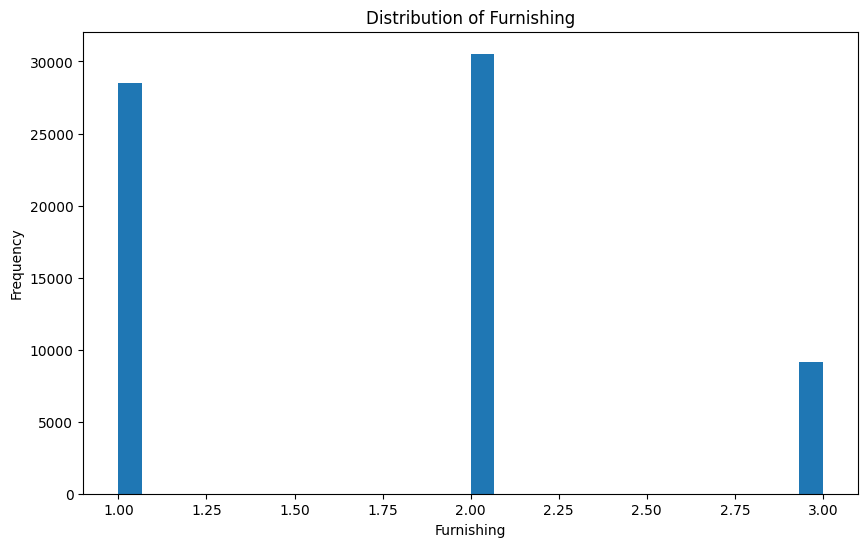

Summary statistics for column facing
count    68192.000000
mean         1.538685
std          1.886236
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          8.000000
Name: facing, dtype: float64


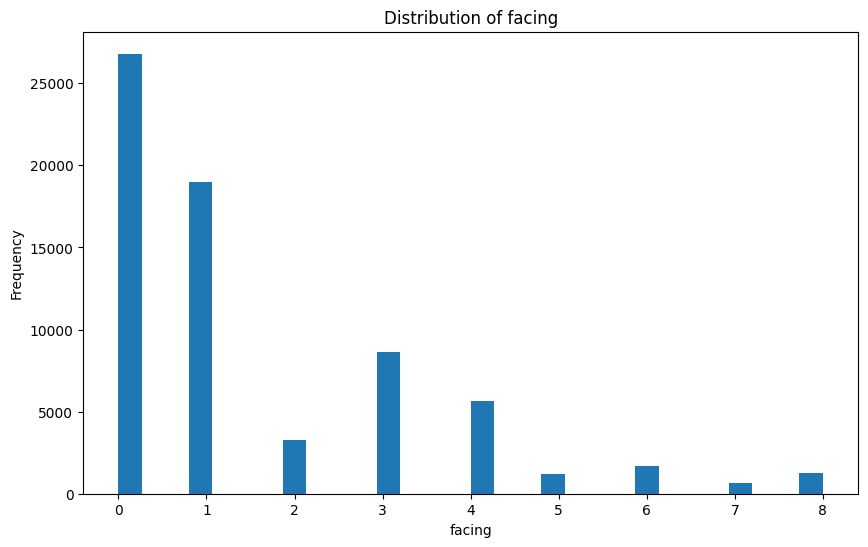

Summary statistics for column overlooking
count    68192.000000
mean         1.498988
std          1.600573
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          7.000000
Name: overlooking, dtype: float64


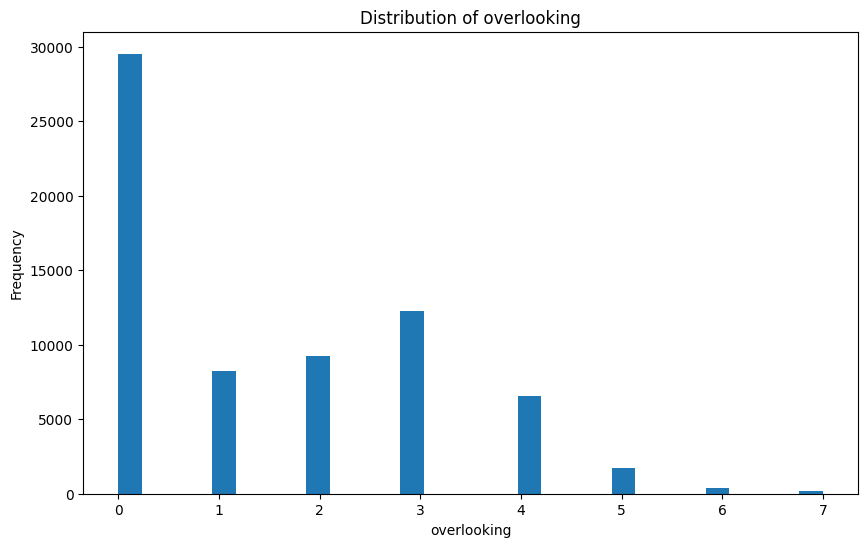

Summary statistics for column Ownership
count    68192.000000
mean         0.818424
std          0.894910
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Ownership, dtype: float64


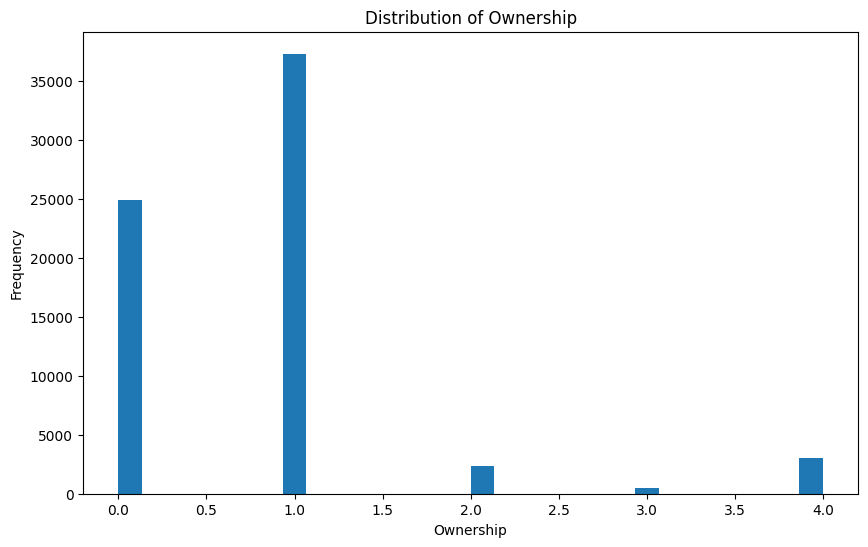

Summary statistics for column Total Area
count    6.819200e+04
mean     2.166856e+04
std      4.877012e+06
min      0.000000e+00
25%      8.300000e+02
50%      1.130000e+03
75%      1.515250e+03
max      1.272096e+09
Name: Total Area, dtype: float64


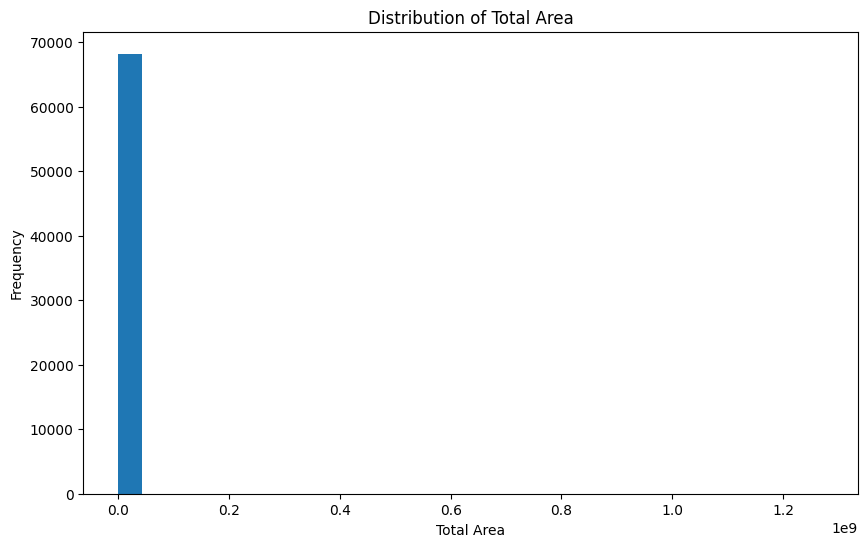

Summary statistics for column Bathroom
count    68192.000000
mean         2.408347
std          0.897524
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: Bathroom, dtype: float64


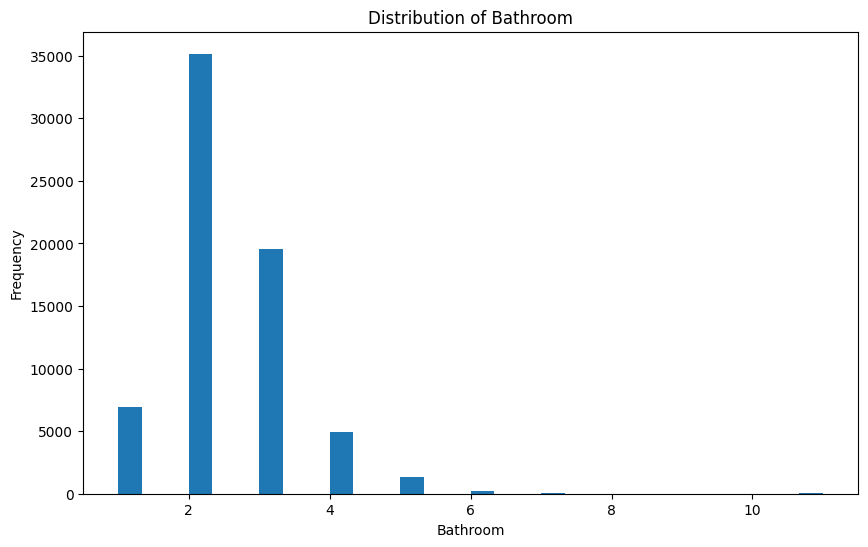

Summary statistics for column Balcony
count    68192.000000
mean         2.062720
std          0.866681
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         11.000000
Name: Balcony, dtype: float64


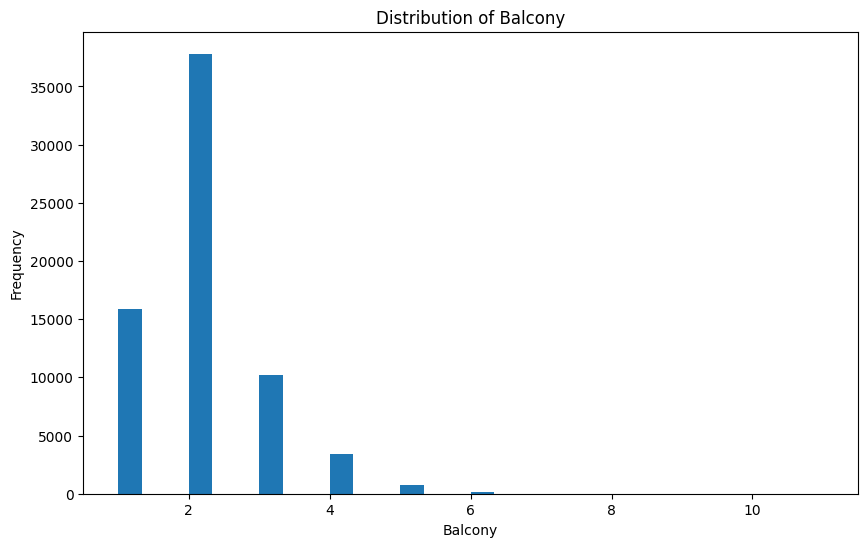

Summary statistics for column current floor
count    68192.000000
mean         4.316393
std          4.354228
min         -2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        200.000000
Name: current floor, dtype: float64


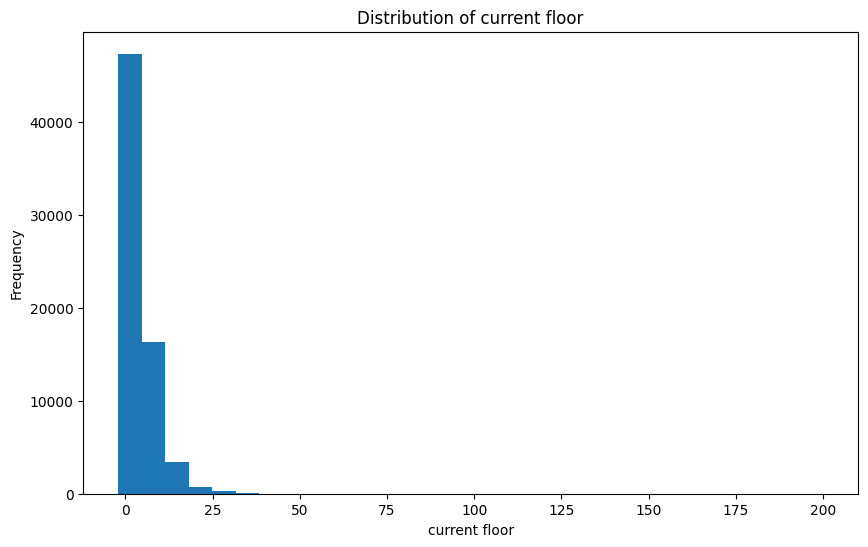

In [48]:
# Univariate analysis for numeric variables

numeric_columns = ['Amount(in rupees)', 'Price (in rupees)','location','Transaction','Furnishing','facing','overlooking','Ownership', 'Total Area', 'Bathroom', 'Balcony','current floor']
for column in numeric_columns:
    print("Summary statistics for column", column)
    print(df[column].describe())
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

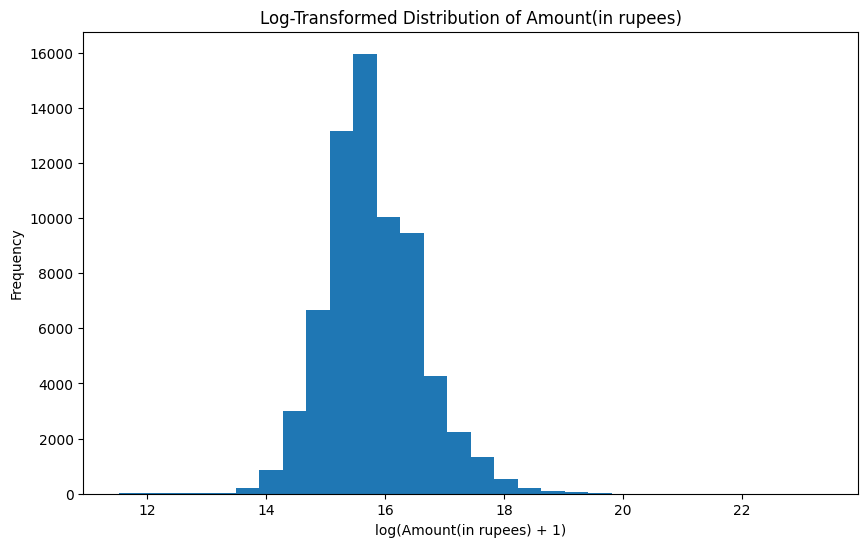

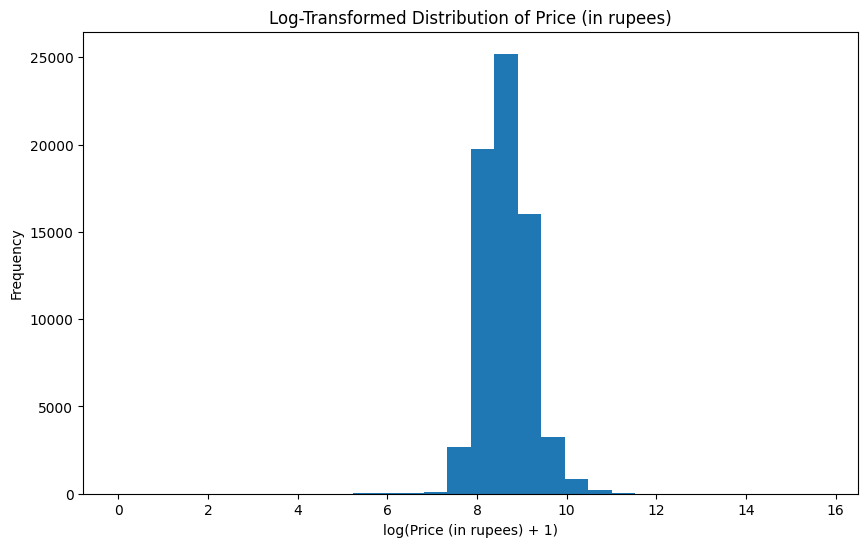

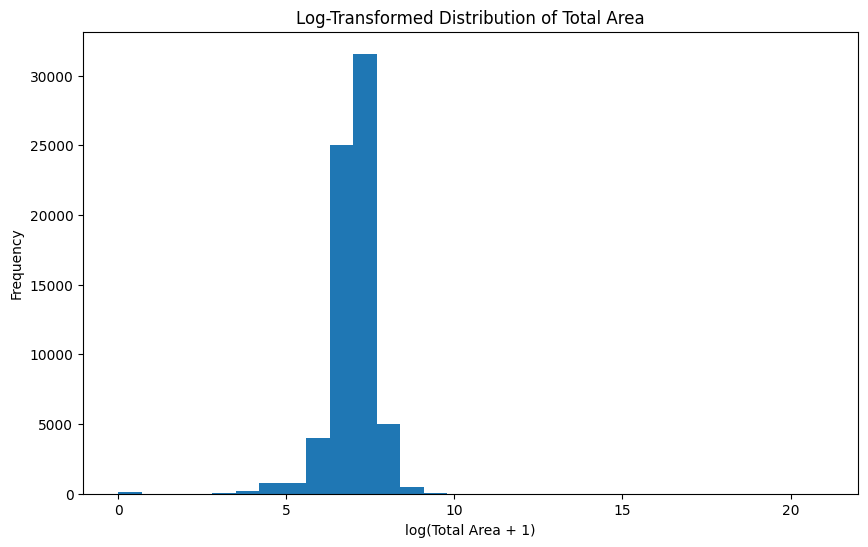

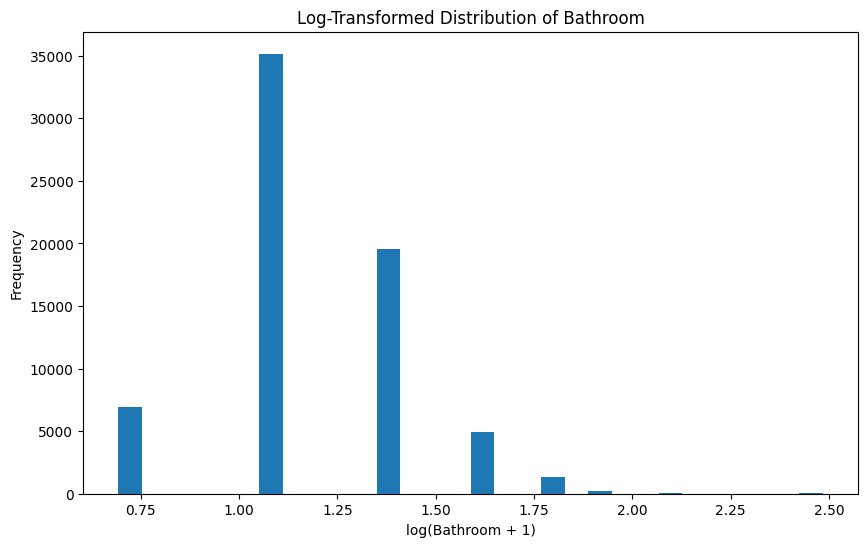

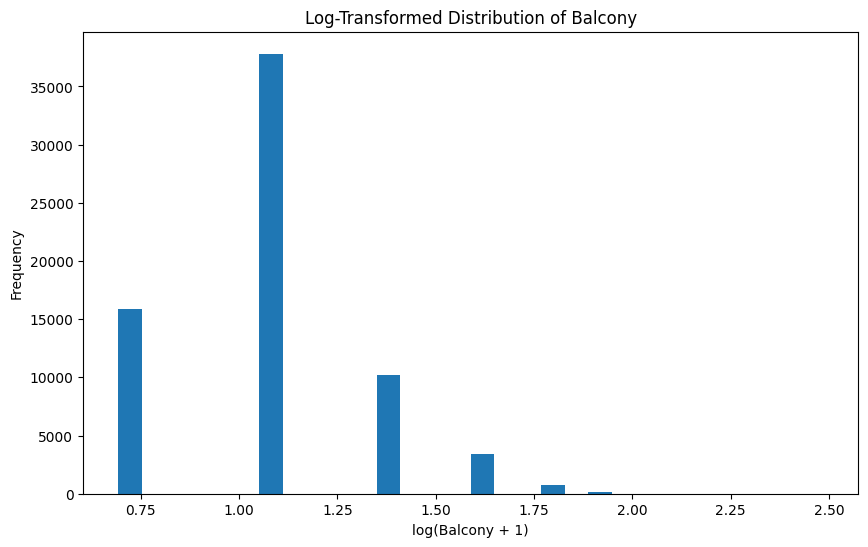

In [49]:
import numpy as np
import matplotlib.pyplot as plt

numeric_columns = ['Amount(in rupees)', 'Price (in rupees)', 'Total Area', 'Bathroom', 'Balcony']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))

# Log transform only if all values are positive
    if (df[column] >= 0).all():
        transformed_data = np.log1p(df[column])
        plt.hist(transformed_data, bins=30)
        plt.title(f"Log-Transformed Distribution of {column}")
        plt.xlabel(f"log({column} + 1)")
    else:
        # Fall back to raw histogram if negative values exist
        plt.hist(df[column], bins=30)
        plt.title(f"Raw Distribution of {column} (log skipped due to negatives)")
        plt.xlabel(column)

    plt.ylabel("Frequency")
    plt.show()

<ipython-input-50-042ad40404b3>:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = df.groupby(binned)[target_column].mean()


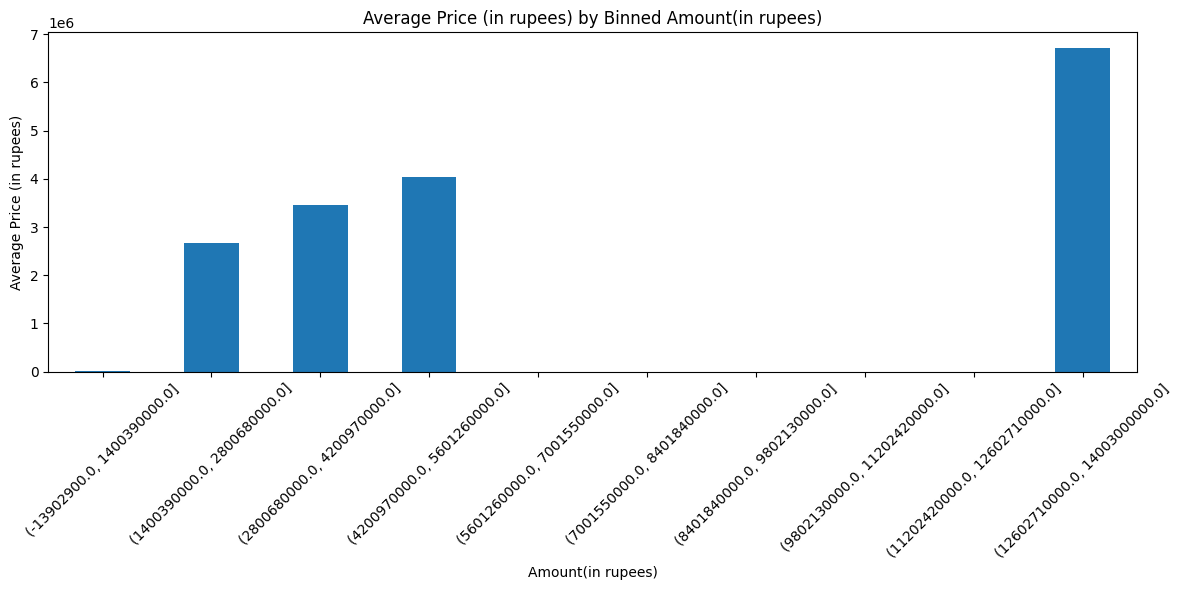

<ipython-input-50-042ad40404b3>:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = df.groupby(binned)[target_column].mean()


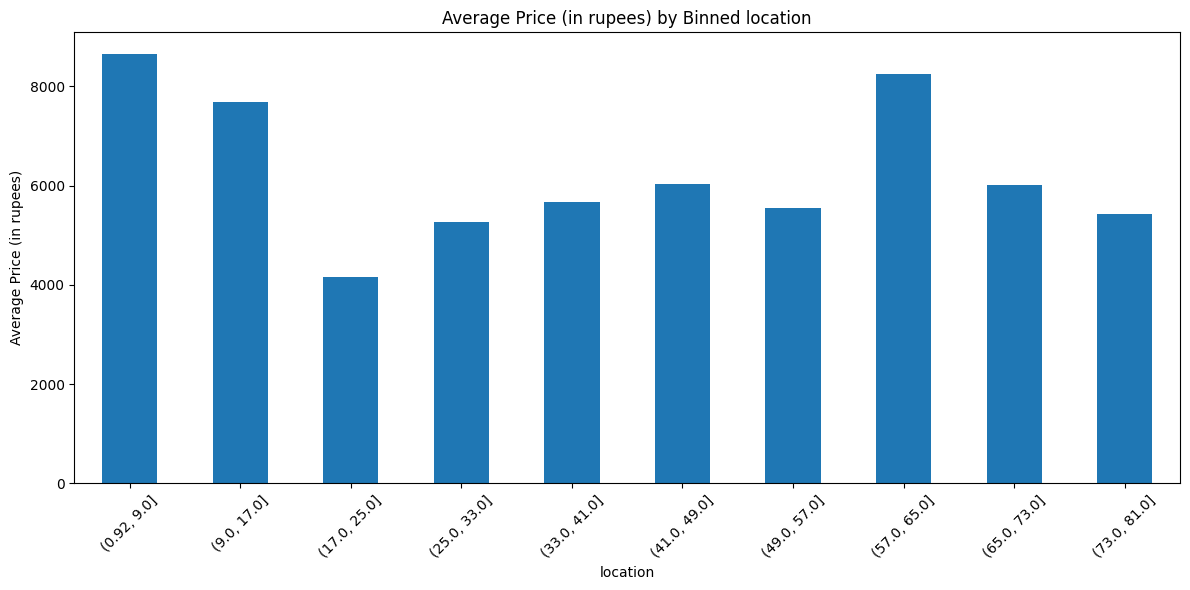

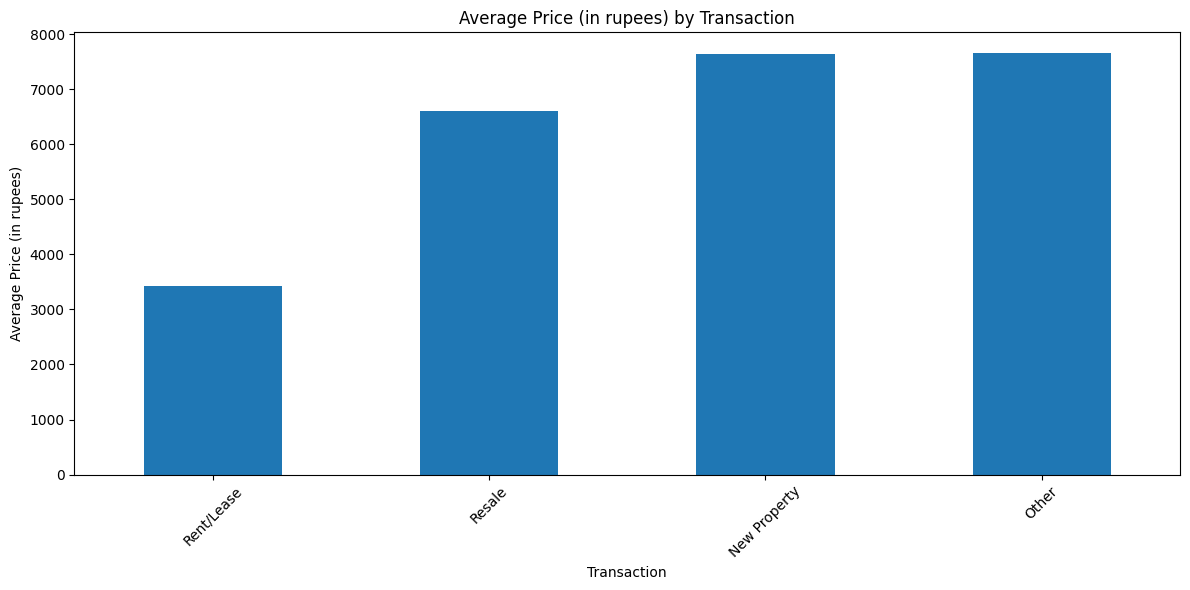

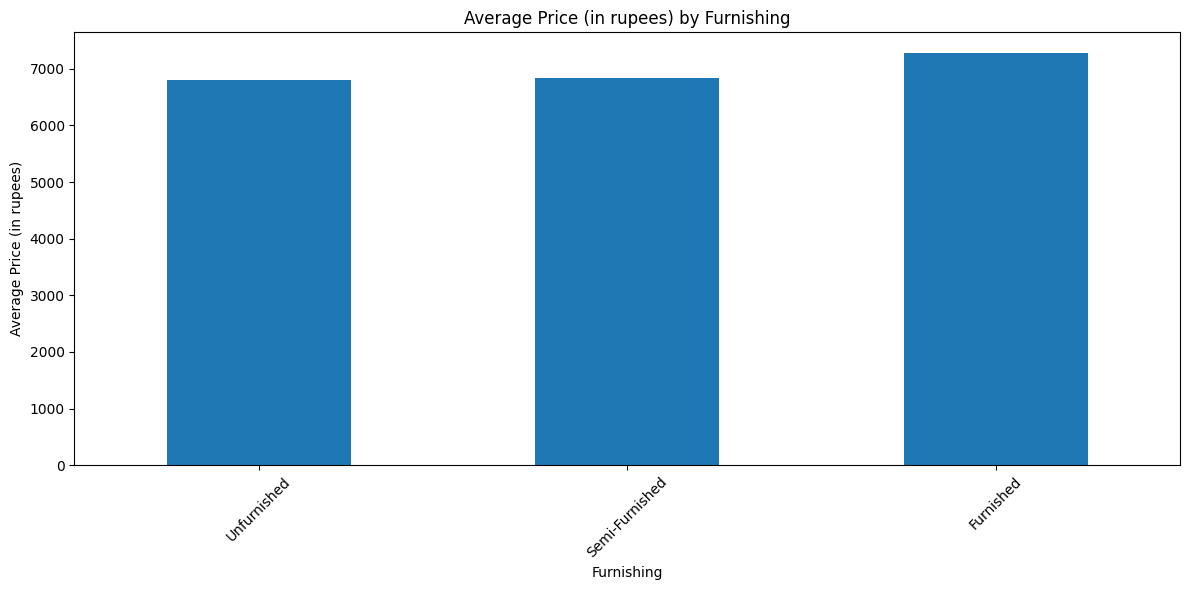

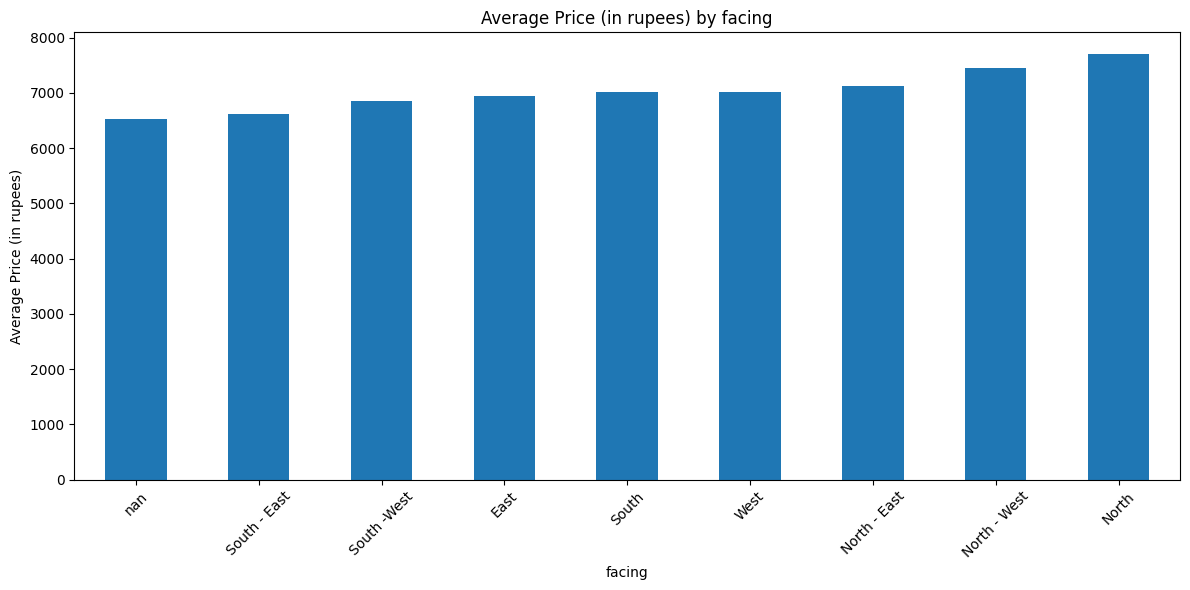

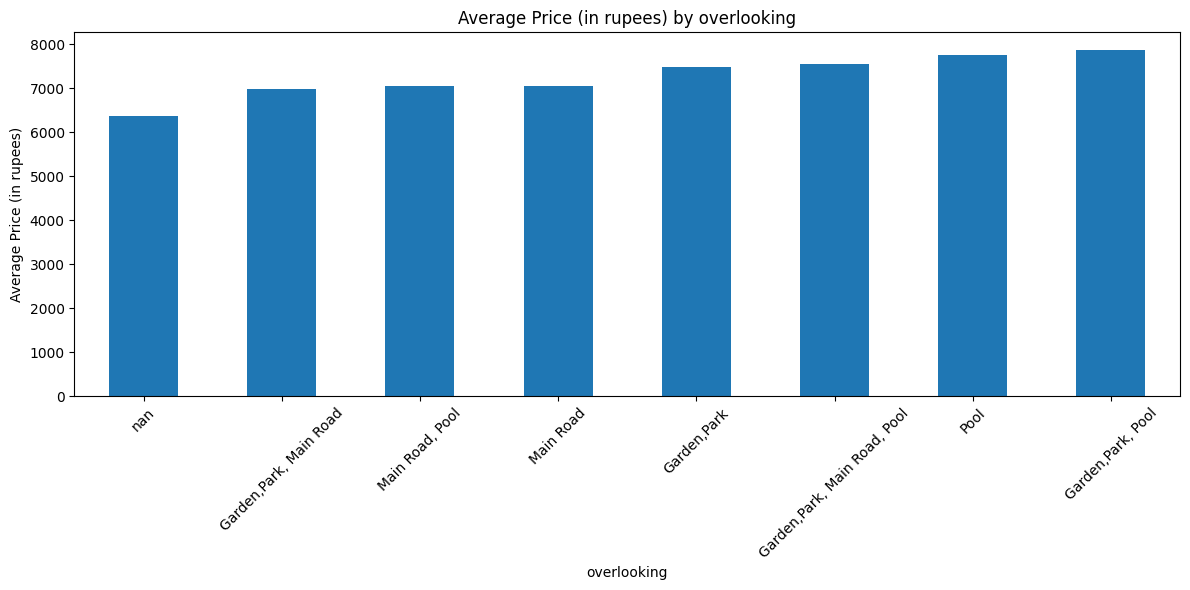

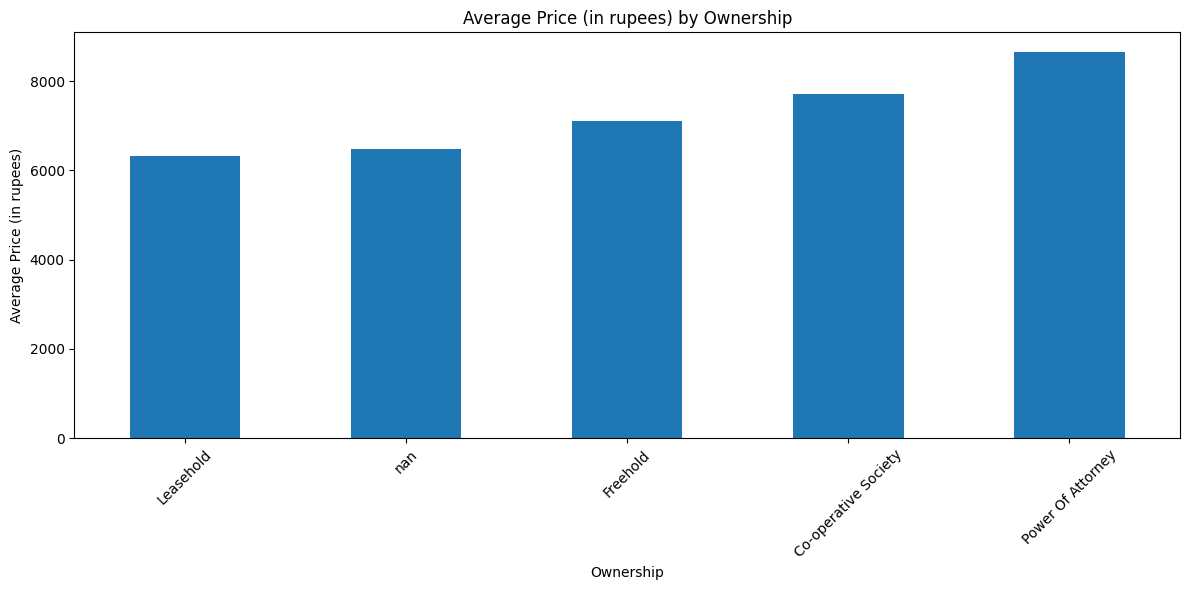

<ipython-input-50-042ad40404b3>:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = df.groupby(binned)[target_column].mean()


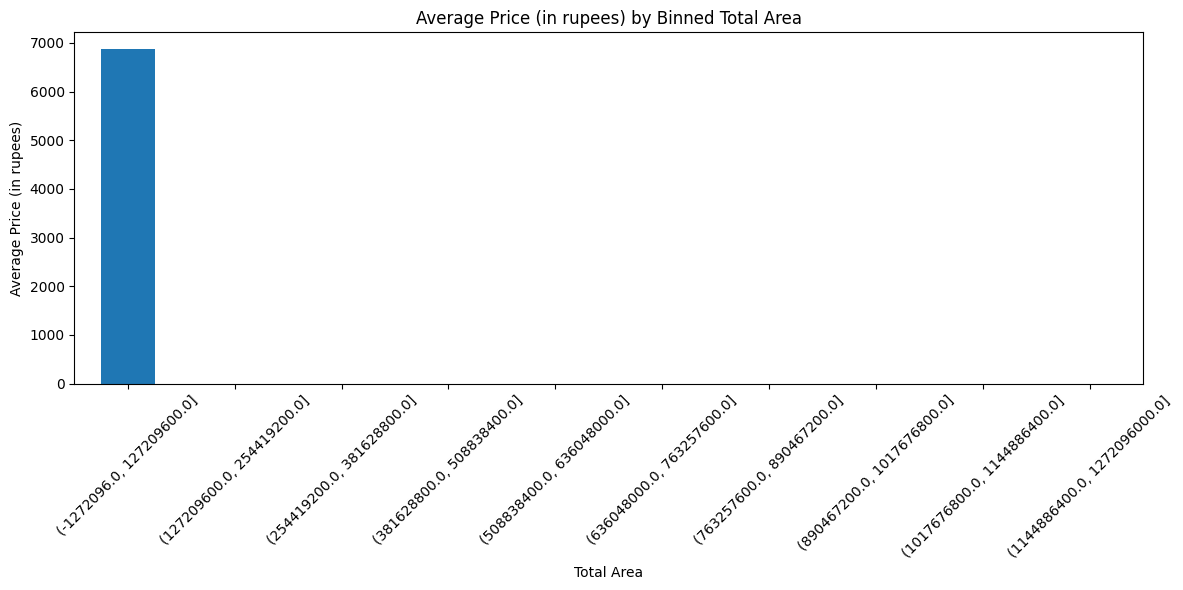

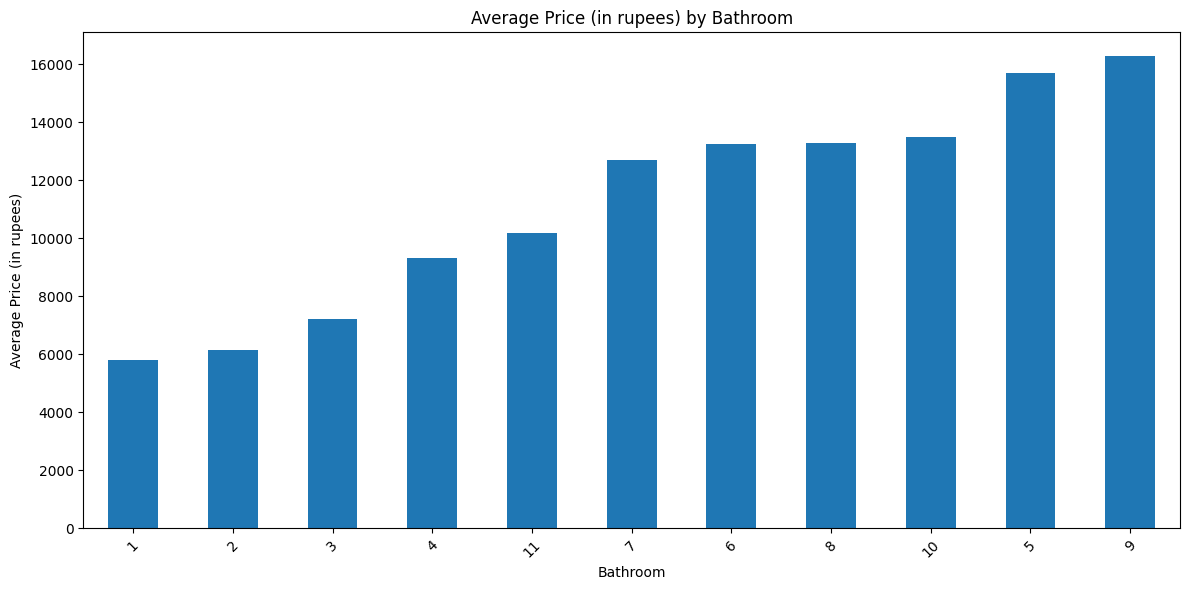

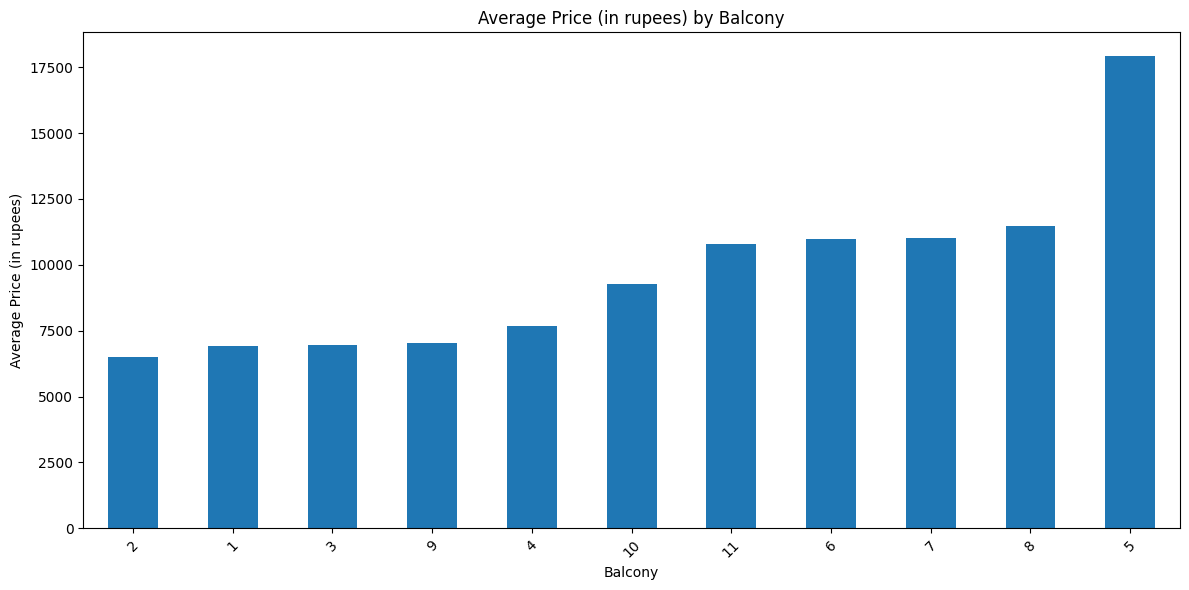

<ipython-input-50-042ad40404b3>:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = df.groupby(binned)[target_column].mean()


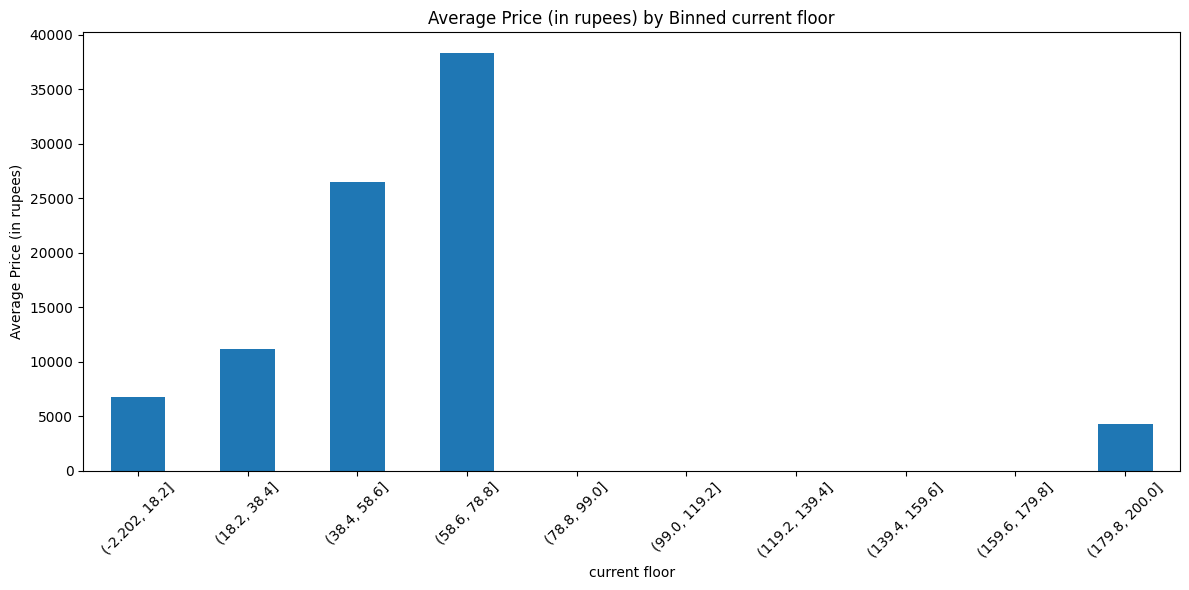

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ===== Category Mappings =====
location_map = {'thane': 1, 'navi-mumbai': 2, 'nagpur': 3, 'mumbai': 4, 'ahmedabad': 5, 'bangalore': 6, 'chennai': 7,
                'gurgaon': 8, 'hyderabad': 9, 'indore': 10, 'jaipur': 11, 'kolkata': 12, 'lucknow': 13, 'new-delhi': 14,
                'noida': 15, 'pune': 16, 'agra': 17, 'ahmadnagar': 18, 'allahabad': 19, 'aurangabad': 20,
                'badlapur': 21, 'belgaum': 22, 'bhiwadi': 23, 'bhiwandi': 24, 'bhopal': 25, 'bhubaneswar': 26,
                'chandigarh': 27, 'coimbatore': 28, 'dehradun': 29, 'durgapur': 30, 'ernakulam': 31, 'faridabad': 32,
                'ghaziabad': 33, 'goa': 34, 'greater-noida': 35, 'guntur': 36, 'guwahati': 37, 'gwalior': 38,
                'haridwar': 39, 'jabalpur': 40, 'jamshedpur': 41, 'jodhpur': 42, 'kalyan': 43, 'kanpur': 44,
                'kochi': 45, 'kozhikode': 46, 'ludhiana': 47, 'madurai': 48, 'mangalore': 49, 'mohali': 50,
                'mysore': 51, 'nashik': 52, 'navsari': 53, 'nellore': 54, 'palakkad': 55, 'palghar': 56,
                'panchkula': 57, 'patna': 58, 'pondicherry': 59, 'raipur': 60, 'rajahmundry': 61, 'ranchi': 62,
                'satara': 63, 'shimla': 64, 'siliguri': 65, 'solapur': 66, 'sonipat': 67, 'surat': 68, 'thrissur': 69,
                'tirupati': 70, 'trichy': 71, 'trivandrum': 72, 'udaipur': 73, 'udupi': 74, 'vadodara': 75,
                'vapi': 76, 'varanasi': 77, 'vijayawada': 78, 'visakhapatnam': 79, 'vrindavan': 80, 'zirakpur': 81}

furnishing_map = {'Unfurnished': 1, 'Semi-Furnished': 2, 'Furnished': 3}
transaction_map = {'Resale': 1, 'New Property': 2, 'Other': 3, 'Rent/Lease': 4}
ownership_map = {'Freehold': 1, 'Co-operative Society': 2, 'Power Of Attorney': 3, 'Leasehold': 4}
facing_map = {'East': 1, 'West': 2, 'North - East': 3, 'North': 4, 'North - West': 5, 'South': 6,
              'South -West': 7, 'South - East': 8}
overlooking_map = {'Garden,Park': 1, 'Garden,Park, Main Road': 2, 'Main Road': 3,
                   'Garden,Park, Main Road, Pool': 4, 'Garden,Park, Pool': 5, 'Pool': 6, 'Main Road, Pool': 7}

# Reverse mappings for label replacement
label_maps = {
    'location': {v: k for k, v in location_map.items()},
    'Furnishing': {v: k for k, v in furnishing_map.items()},
    'Transaction': {v: k for k, v in transaction_map.items()},
    'Ownership': {v: k for k, v in ownership_map.items()},
    'facing': {v: k for k, v in facing_map.items()},
    'overlooking': {v: k for k, v in overlooking_map.items()},
}

# ===== Plotting =====
target_column = 'Price (in rupees)'
features = ['Amount(in rupees)', 'location', 'Transaction', 'Furnishing',
            'facing', 'overlooking', 'Ownership', 'Total Area',
            'Bathroom', 'Balcony', 'current floor']

for column in features:
    plt.figure(figsize=(12, 6))

    if df[column].dtype == 'object' or df[column].nunique() < 20:
        mean_price = df.groupby(column)[target_column].mean().sort_values()

        # Replace encoded labels with names if available
        if column in label_maps:
            mean_price.index = mean_price.index.map(label_maps[column])

        mean_price.plot(kind='bar')
        plt.title(f"Average {target_column} by {column}")
        plt.ylabel(f"Average {target_column}")
        plt.xlabel(column)
        plt.xticks(rotation=45)

    else:
        # For numeric features, bin and plot
        binned = pd.cut(df[column], bins=10)
        mean_price = df.groupby(binned)[target_column].mean()
        mean_price.plot(kind='bar')
        plt.title(f"Average {target_column} by Binned {column}")
        plt.ylabel(f"Average {target_column}")
        plt.xlabel(column)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

<ipython-input-58-dfdf6b4c3017>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = filtered.groupby(binned)[target_column].mean().sort_index()


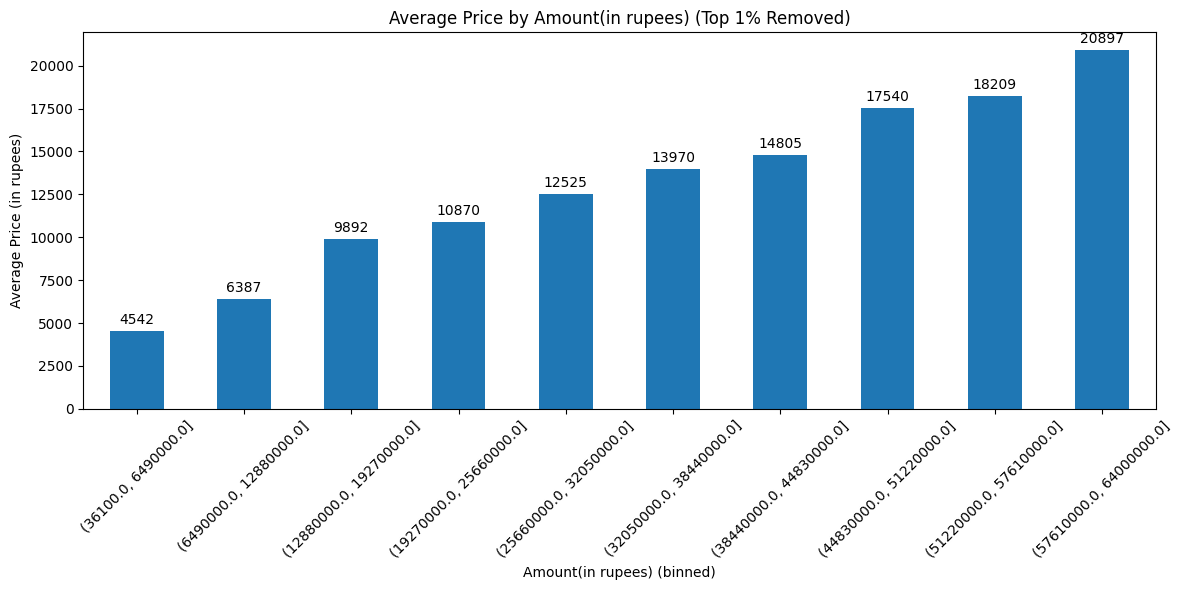

<ipython-input-58-dfdf6b4c3017>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = filtered.groupby(binned)[target_column].mean().sort_index()


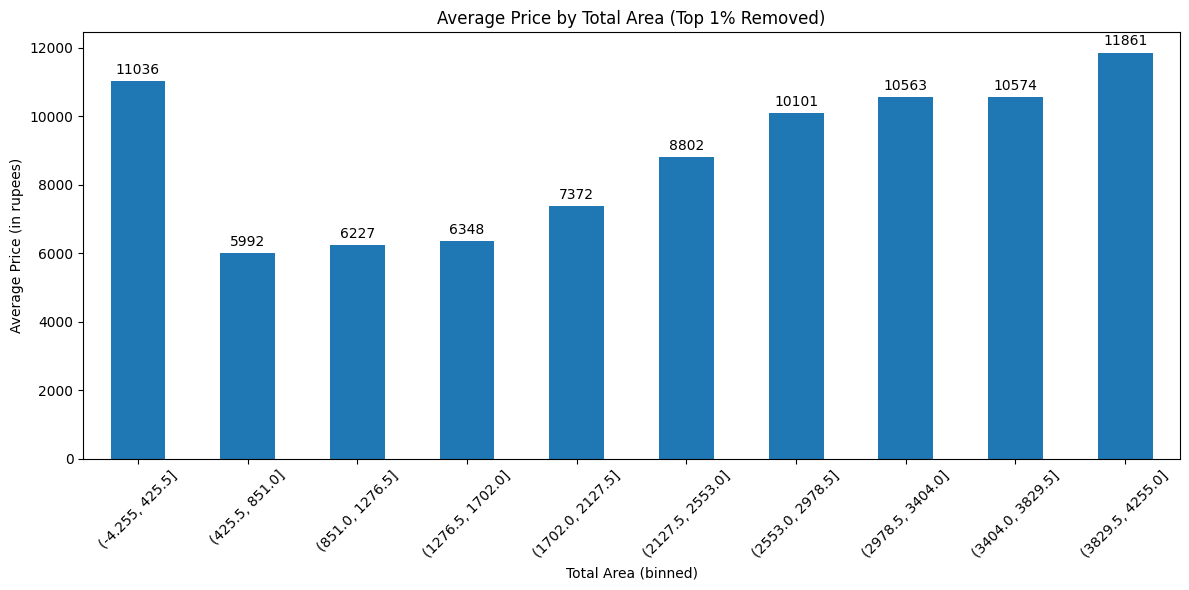

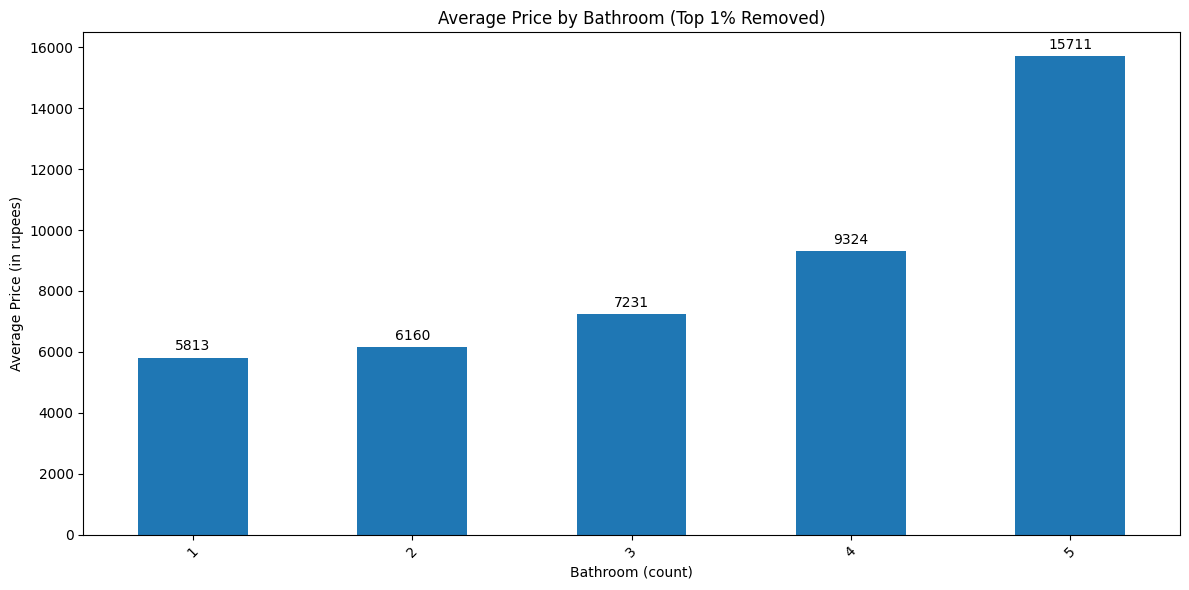

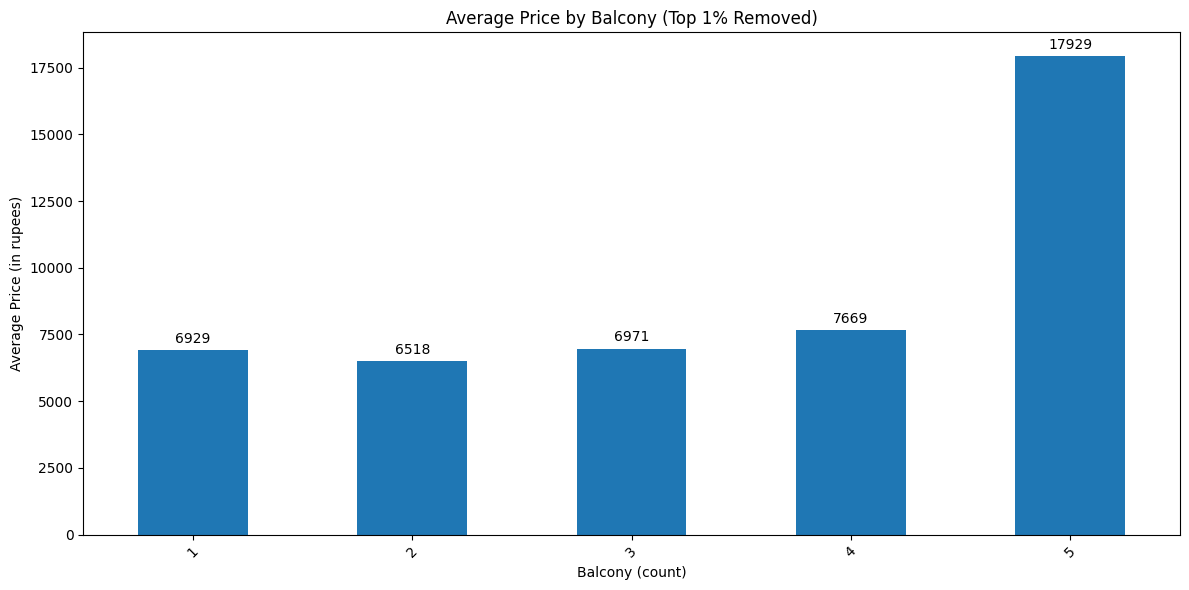

<ipython-input-58-dfdf6b4c3017>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[column] = filtered[column].astype(int)


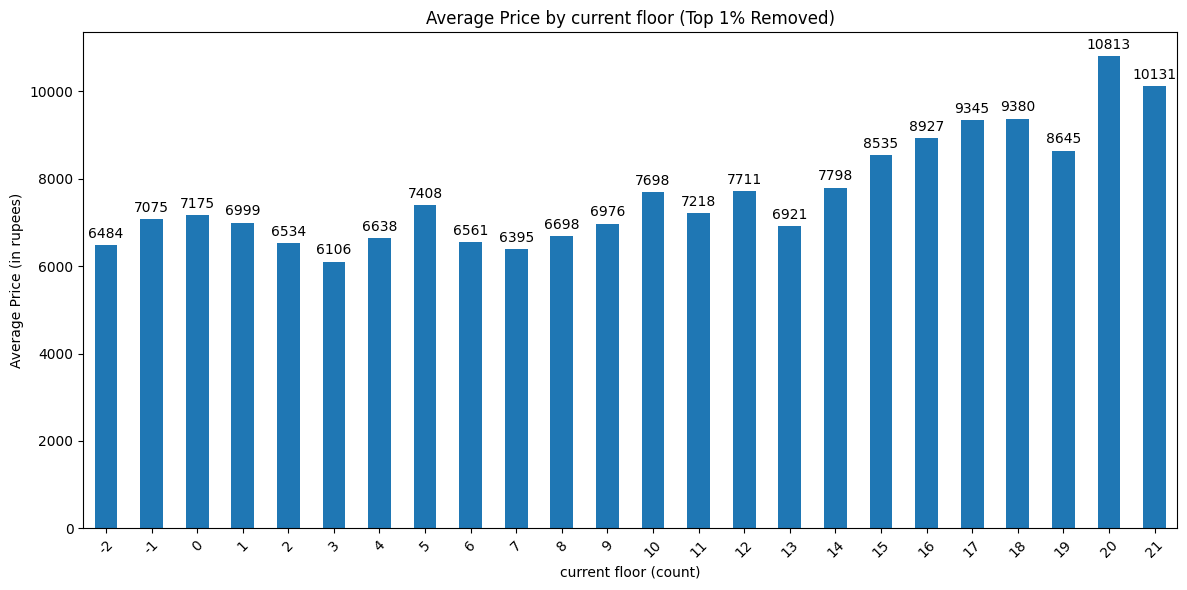

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

target_column = 'Price (in rupees)'
features = ['Amount(in rupees)', 'Total Area', 'Bathroom', 'Balcony', 'current floor']

# Features to group by as integers directly
integer_bucket_features = ['Bathroom', 'Balcony', 'current floor']

for column in features:
    plt.figure(figsize=(12, 6))

    # Drop missing values and remove top 1% outliers
    filtered = df[[column, target_column]].dropna()
    threshold = filtered[column].quantile(0.99)
    filtered = filtered[filtered[column] <= threshold]

    if column in integer_bucket_features:
        # Round or convert to int, then group
        filtered[column] = filtered[column].astype(int)
        mean_price = filtered.groupby(column)[target_column].mean().sort_index()
        x_label = f"{column} (count)"
    else:
        # Bin into 10 equal-width bins for continuous features
        binned = pd.cut(filtered[column], bins=10)
        mean_price = filtered.groupby(binned)[target_column].mean().sort_index()
        x_label = f"{column} (binned)"

    # Plot and add labels
    ax = mean_price.plot(kind='bar')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

    plt.title(f"Average Price by {column} (Top 1% Removed)")
    plt.xlabel(x_label)
    plt.ylabel("Average Price (in rupees)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-52-fc98725a0259>:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_amount = filtered.groupby(binned)[target_column].mean()


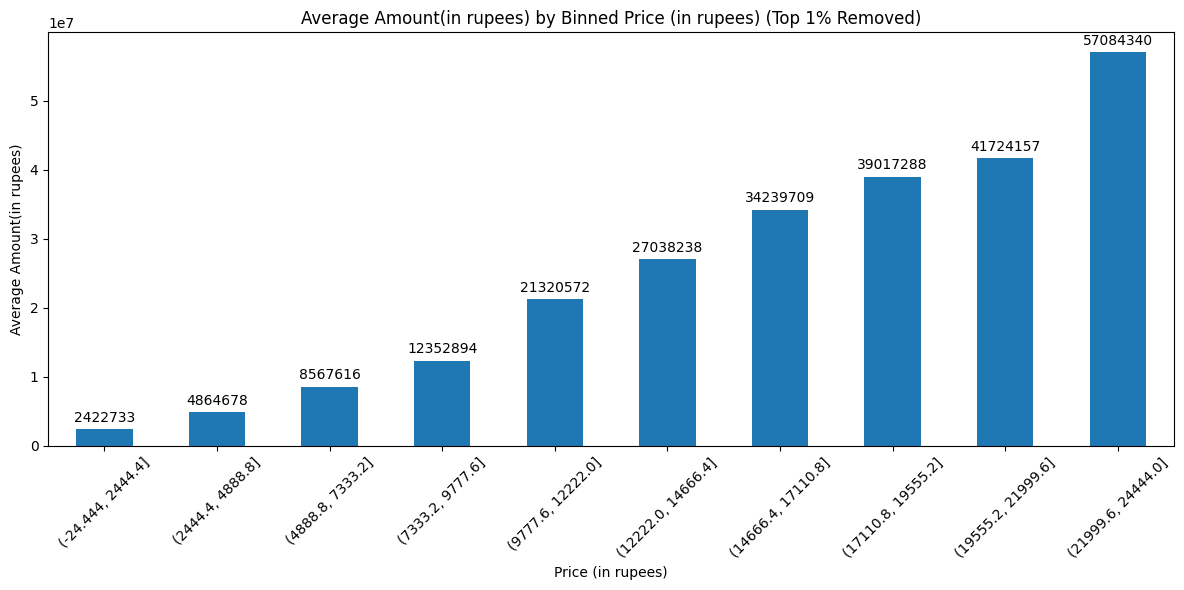

<ipython-input-52-fc98725a0259>:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_amount = filtered.groupby(binned)[target_column].mean()


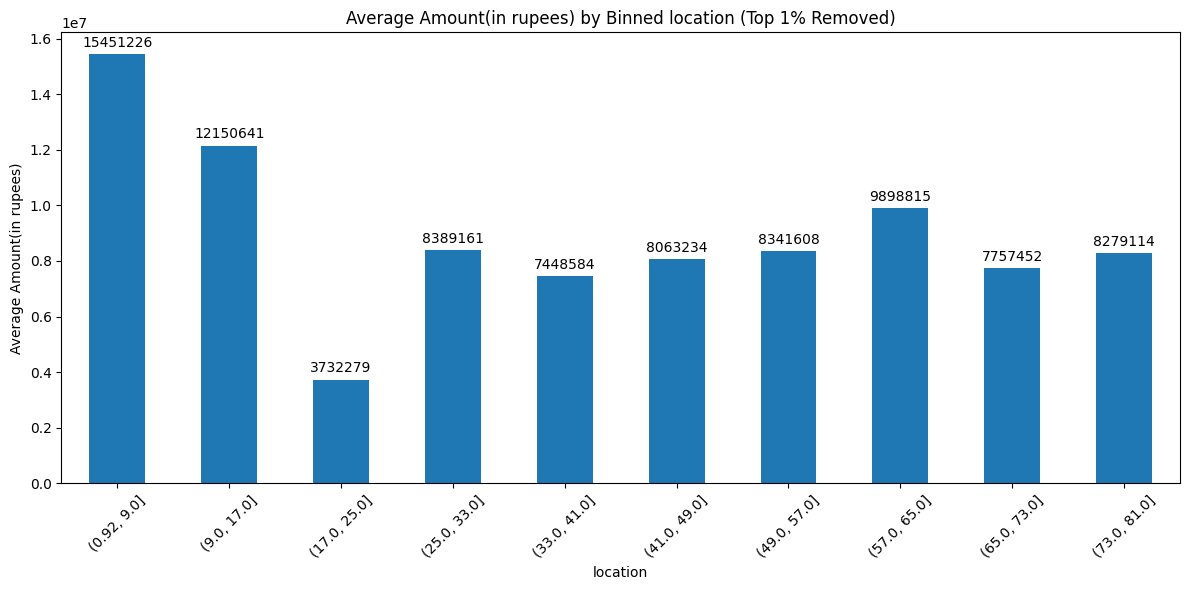

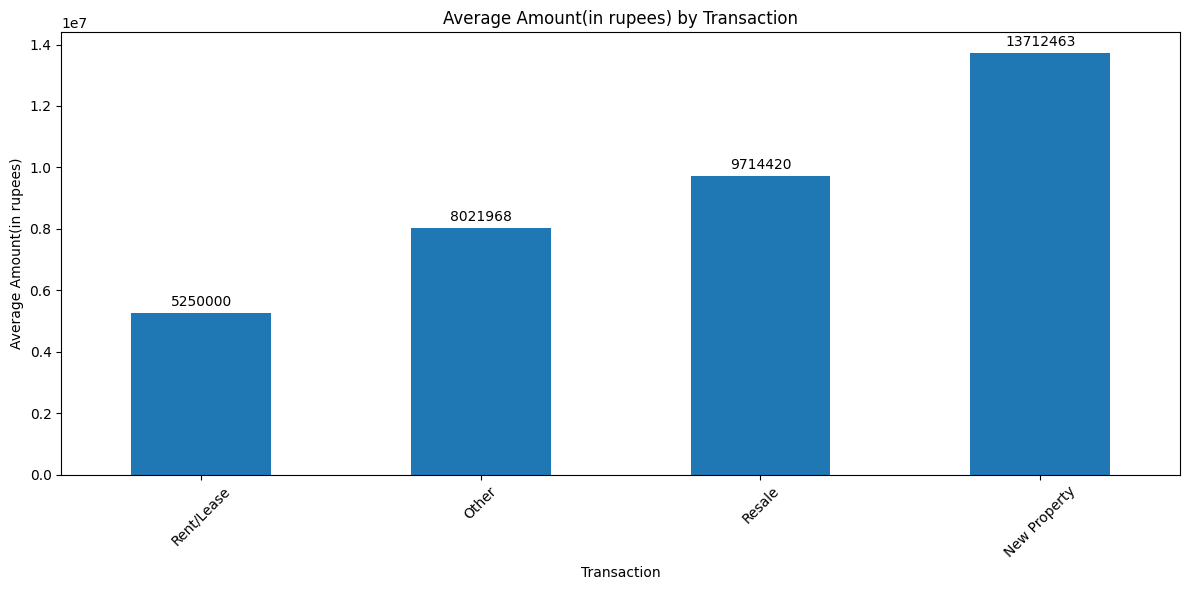

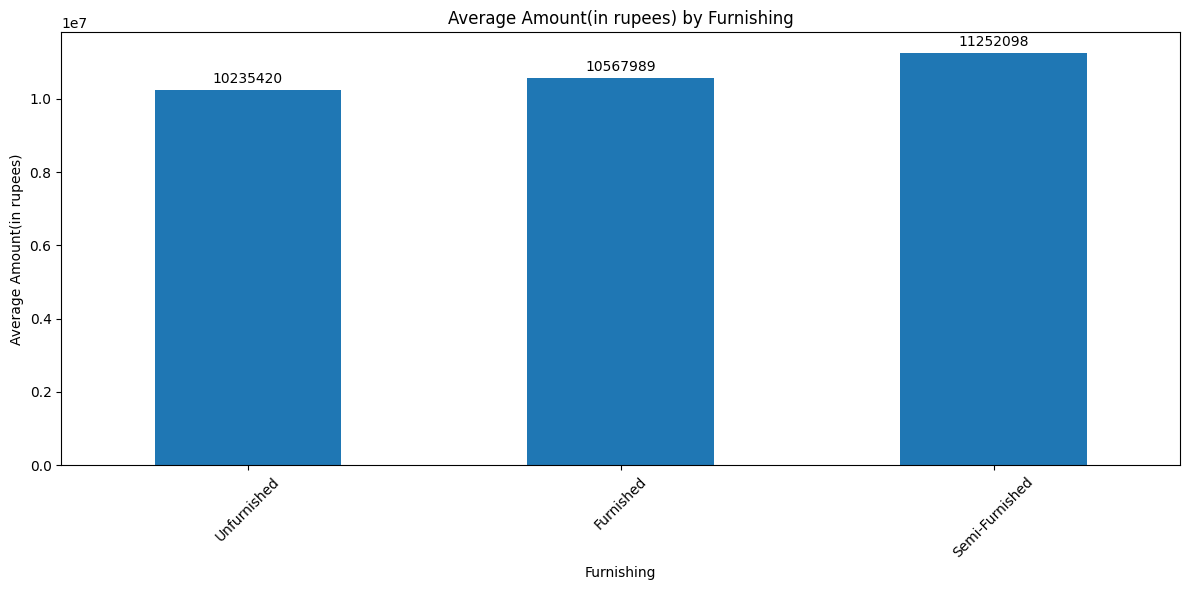

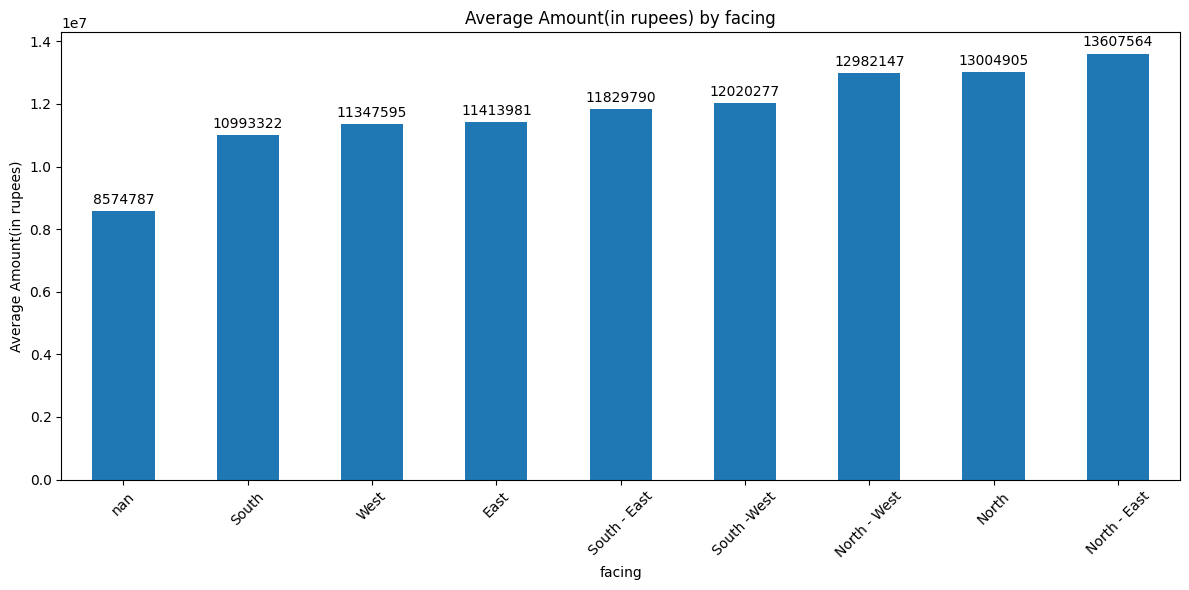

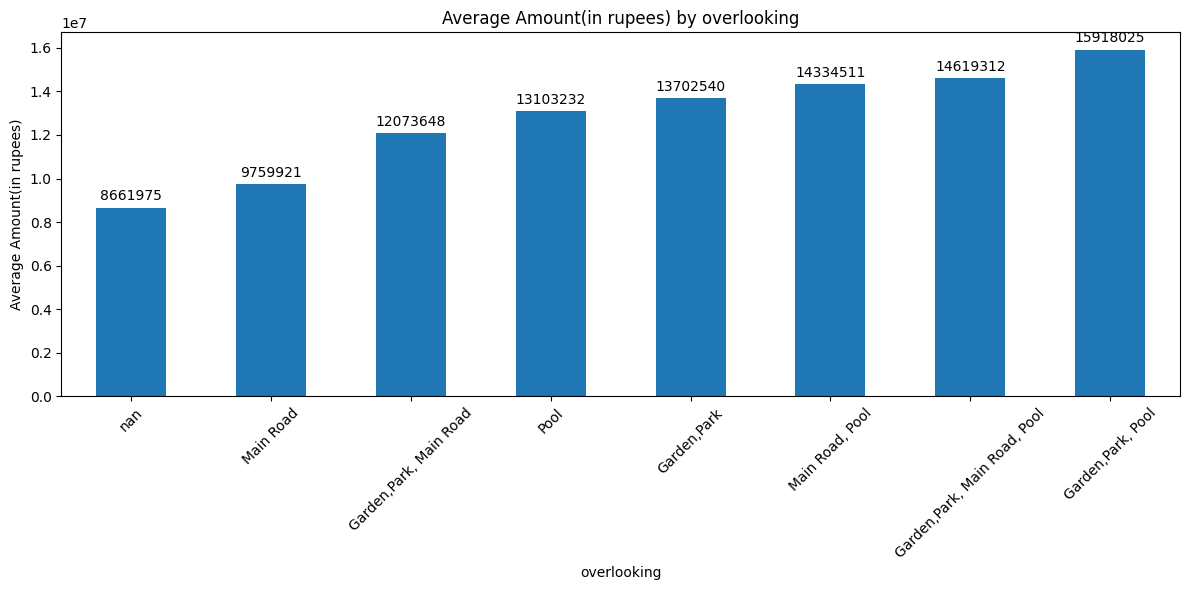

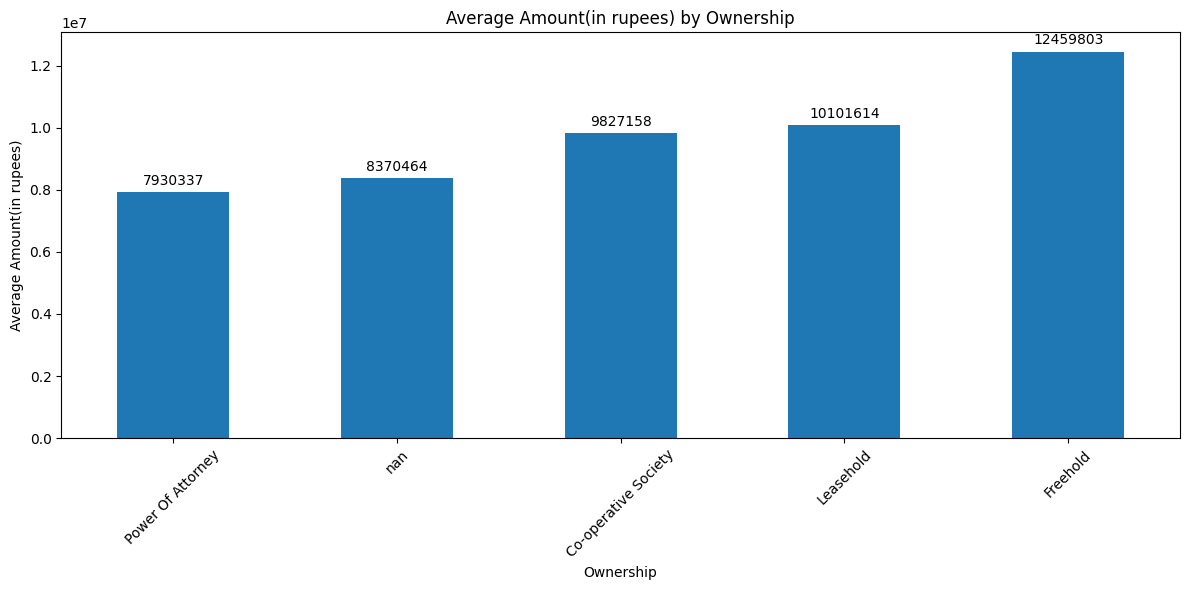

<ipython-input-52-fc98725a0259>:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_amount = filtered.groupby(binned)[target_column].mean()


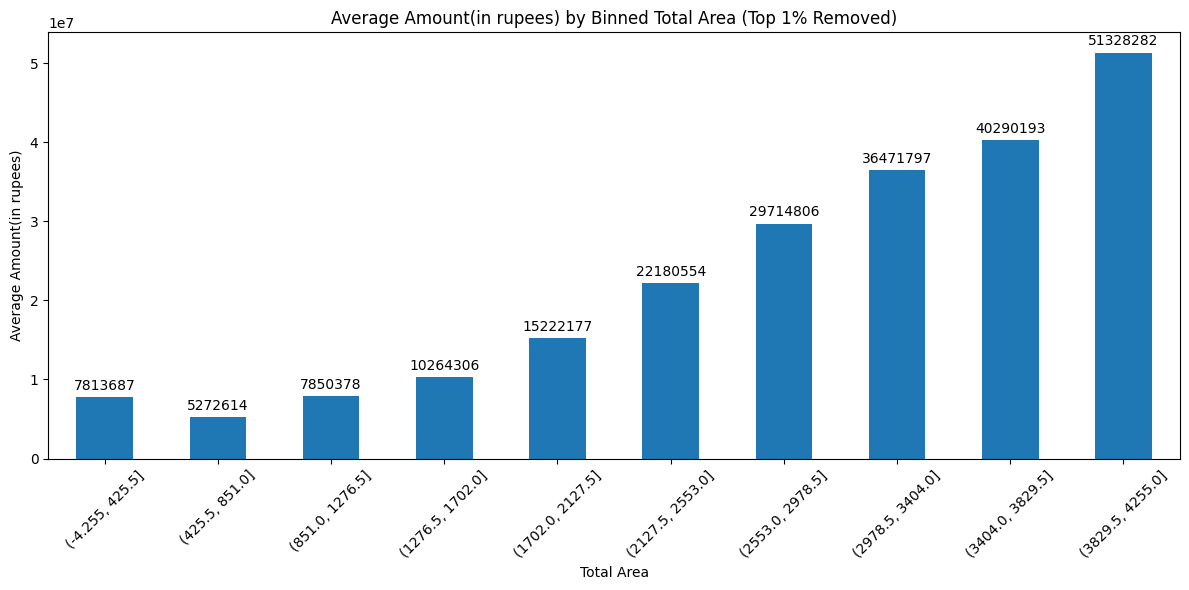

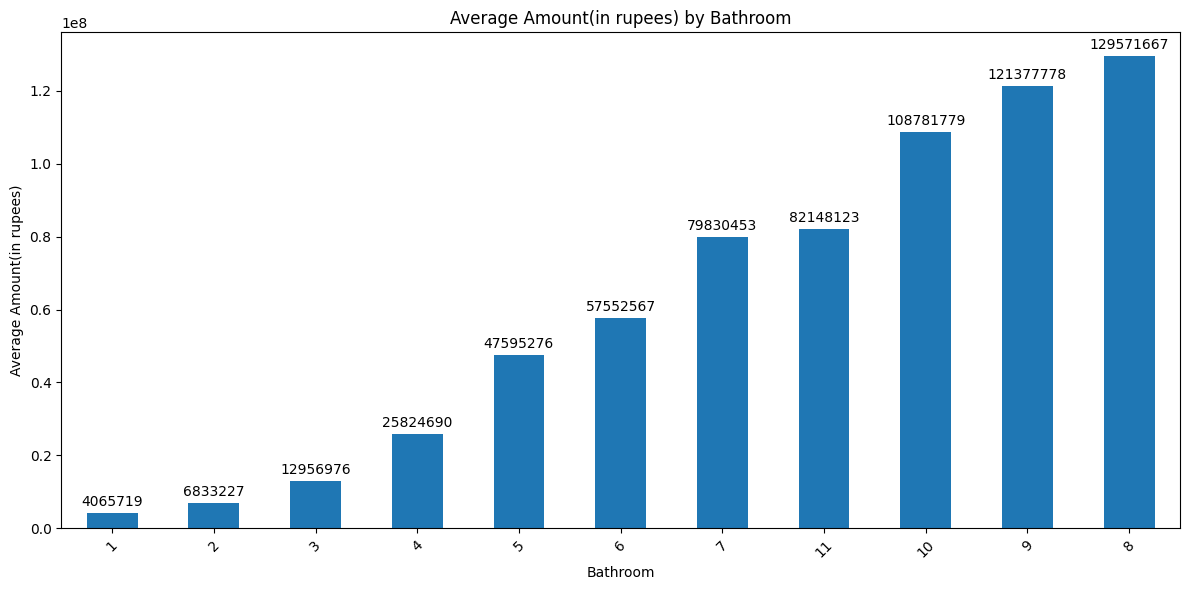

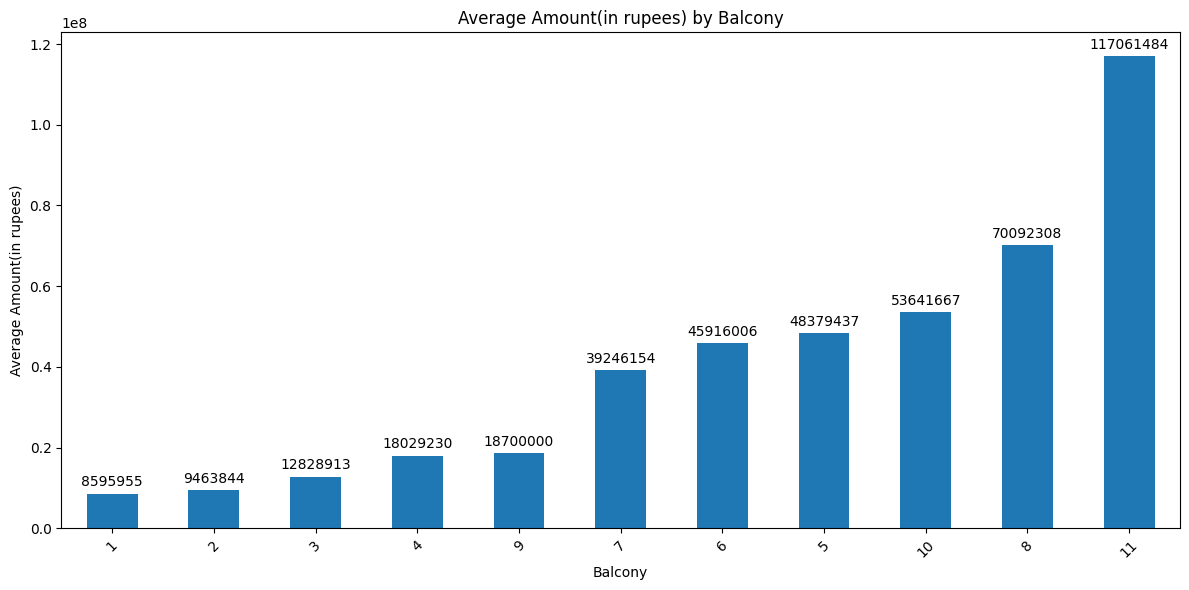

<ipython-input-52-fc98725a0259>:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_amount = filtered.groupby(binned)[target_column].mean()


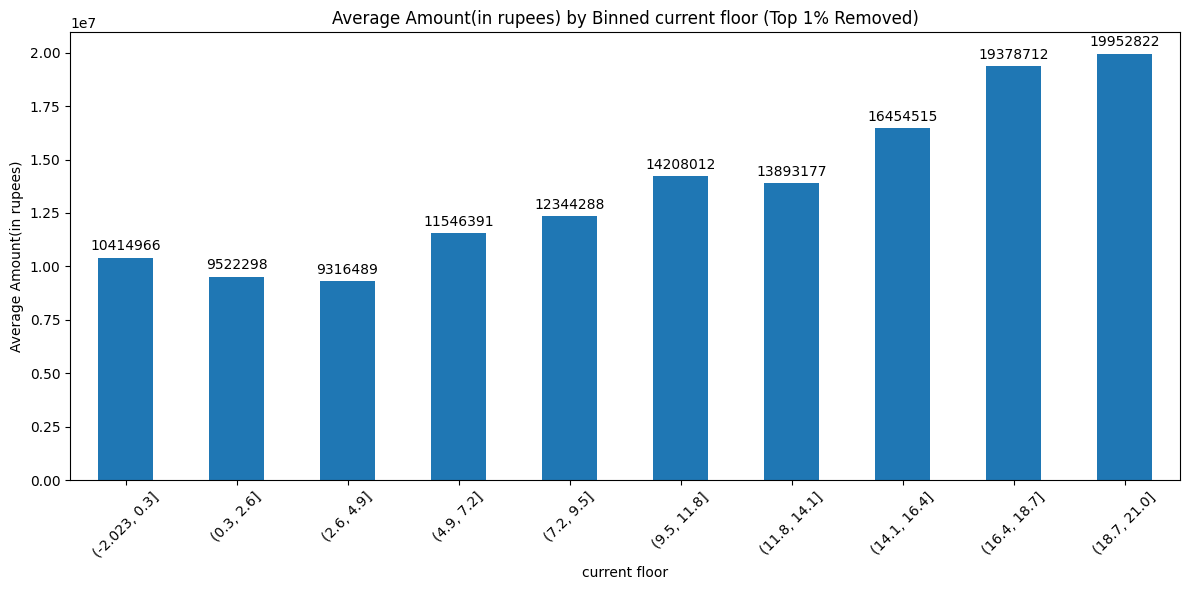

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ===== Mappings for Categorical Features =====
location_map = {'thane': 1, 'navi-mumbai': 2, 'nagpur': 3, 'mumbai': 4, 'ahmedabad': 5, 'bangalore': 6, 'chennai': 7,
                'gurgaon': 8, 'hyderabad': 9, 'indore': 10, 'jaipur': 11, 'kolkata': 12, 'lucknow': 13, 'new-delhi': 14,
                'noida': 15, 'pune': 16, 'agra': 17, 'ahmadnagar': 18, 'allahabad': 19, 'aurangabad': 20,
                'badlapur': 21, 'belgaum': 22, 'bhiwadi': 23, 'bhiwandi': 24, 'bhopal': 25, 'bhubaneswar': 26,
                'chandigarh': 27, 'coimbatore': 28, 'dehradun': 29, 'durgapur': 30, 'ernakulam': 31, 'faridabad': 32,
                'ghaziabad': 33, 'goa': 34, 'greater-noida': 35, 'guntur': 36, 'guwahati': 37, 'gwalior': 38,
                'haridwar': 39, 'jabalpur': 40, 'jamshedpur': 41, 'jodhpur': 42, 'kalyan': 43, 'kanpur': 44,
                'kochi': 45, 'kozhikode': 46, 'ludhiana': 47, 'madurai': 48, 'mangalore': 49, 'mohali': 50,
                'mysore': 51, 'nashik': 52, 'navsari': 53, 'nellore': 54, 'palakkad': 55, 'palghar': 56,
                'panchkula': 57, 'patna': 58, 'pondicherry': 59, 'raipur': 60, 'rajahmundry': 61, 'ranchi': 62,
                'satara': 63, 'shimla': 64, 'siliguri': 65, 'solapur': 66, 'sonipat': 67, 'surat': 68, 'thrissur': 69,
                'tirupati': 70, 'trichy': 71, 'trivandrum': 72, 'udaipur': 73, 'udupi': 74, 'vadodara': 75,
                'vapi': 76, 'varanasi': 77, 'vijayawada': 78, 'visakhapatnam': 79, 'vrindavan': 80, 'zirakpur': 81}
furnishing_map = {'Unfurnished': 1, 'Semi-Furnished': 2, 'Furnished': 3}
transaction_map = {'Resale': 1, 'New Property': 2, 'Other': 3, 'Rent/Lease': 4}
ownership_map = {'Freehold': 1, 'Co-operative Society': 2, 'Power Of Attorney': 3, 'Leasehold': 4}
facing_map = {'East': 1, 'West': 2, 'North - East': 3, 'North': 4, 'North - West': 5, 'South': 6,
              'South -West': 7, 'South - East': 8}
overlooking_map = {'Garden,Park': 1, 'Garden,Park, Main Road': 2, 'Main Road': 3,
                   'Garden,Park, Main Road, Pool': 4, 'Garden,Park, Pool': 5, 'Pool': 6, 'Main Road, Pool': 7}

label_maps = {
    'location': {v: k for k, v in location_map.items()},
    'Furnishing': {v: k for k, v in furnishing_map.items()},
    'Transaction': {v: k for k, v in transaction_map.items()},
    'Ownership': {v: k for k, v in ownership_map.items()},
    'facing': {v: k for k, v in facing_map.items()},
    'overlooking': {v: k for k, v in overlooking_map.items()},
}

# ===== Plotting Code =====
target_column = 'Amount(in rupees)'
features = ['Price (in rupees)', 'location', 'Transaction', 'Furnishing',
            'facing', 'overlooking', 'Ownership', 'Total Area',
            'Bathroom', 'Balcony', 'current floor']

for column in features:
    plt.figure(figsize=(12, 6))

    if df[column].dtype == 'object' or df[column].nunique() < 20:
        mean_amount = df.groupby(column)[target_column].mean().sort_values()

        # Map labels if column is encoded
        if column in label_maps:
            mean_amount.index = mean_amount.index.map(label_maps[column])

        # Plot and add labels
        ax = mean_amount.plot(kind='bar')
        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f', padding=3)

        plt.title(f"Average {target_column} by {column}")
        plt.ylabel(f"Average {target_column}")
        plt.xlabel(column)
        plt.xticks(rotation=45)

    else:
        # For numeric: bin and label
        filtered = df[[column, target_column]].dropna()
        threshold = filtered[column].quantile(0.99)
        filtered = filtered[filtered[column] <= threshold]
        binned = pd.cut(filtered[column], bins=10)
        mean_amount = filtered.groupby(binned)[target_column].mean()

        # Plot and add labels
        ax = mean_amount.plot(kind='bar')
        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f', padding=3)

        plt.title(f"Average {target_column} by Binned {column} (Top 1% Removed)")
        plt.ylabel(f"Average {target_column}")
        plt.xlabel(column)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

<ipython-input-60-2ec33c1b5ef0>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = filtered.groupby(binned)[target_column].mean().sort_index()


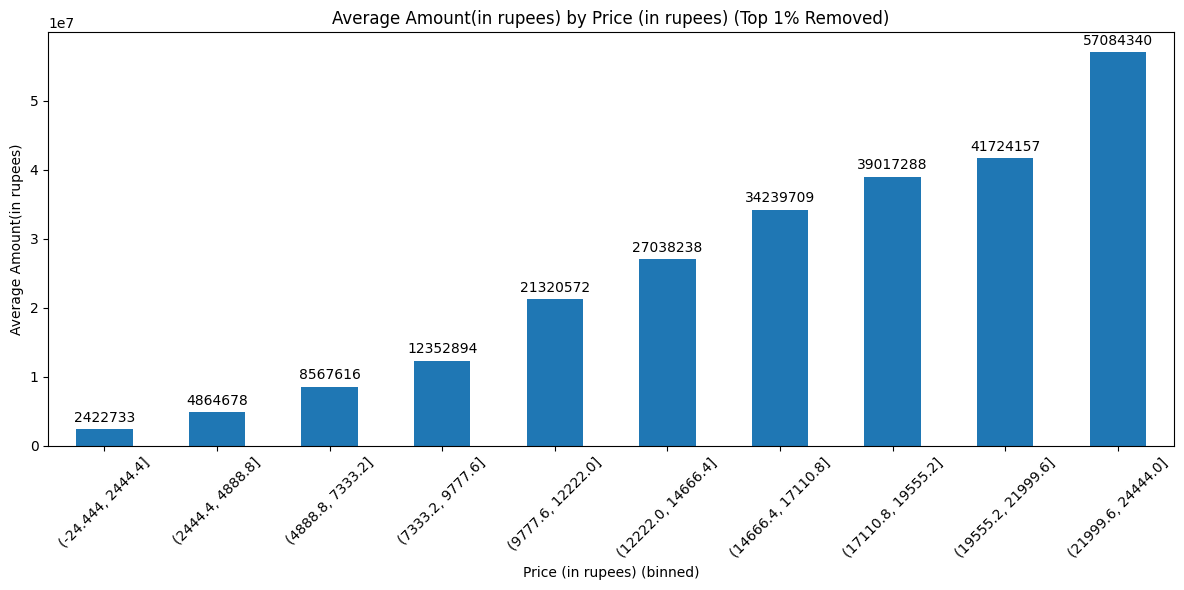

<ipython-input-60-2ec33c1b5ef0>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = filtered.groupby(binned)[target_column].mean().sort_index()


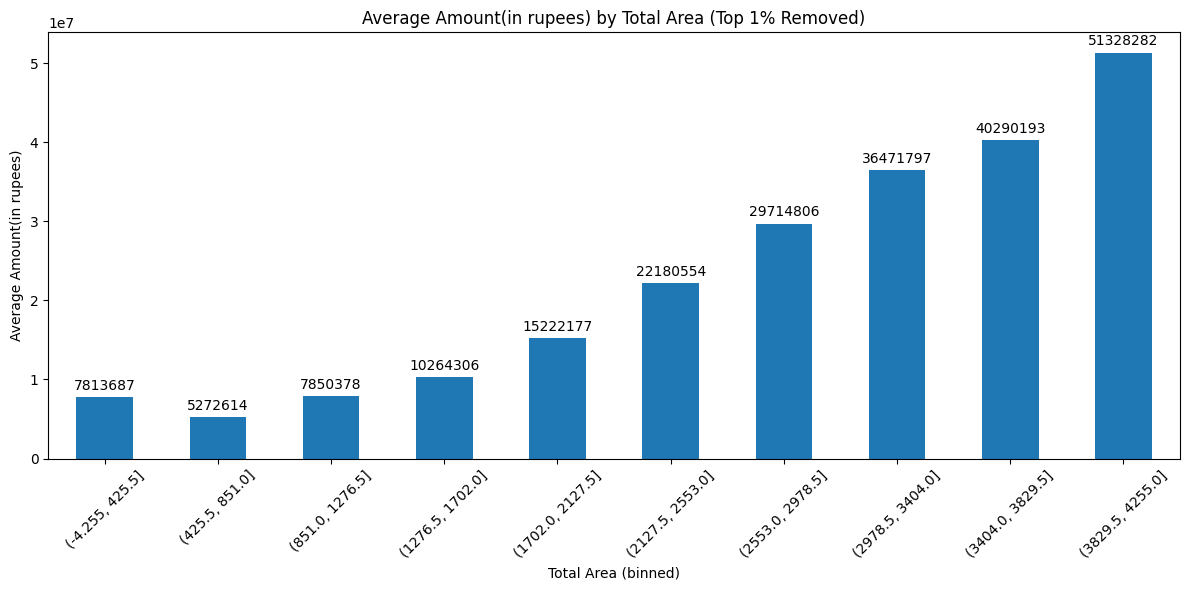

<ipython-input-60-2ec33c1b5ef0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered[column] = filtered[column].astype(int)


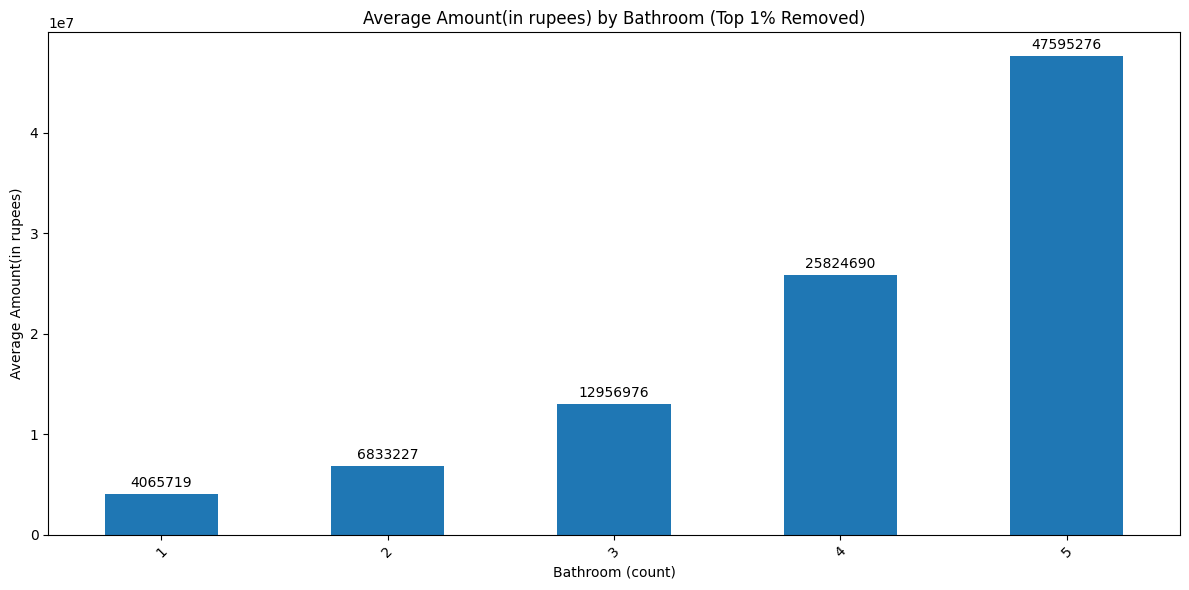

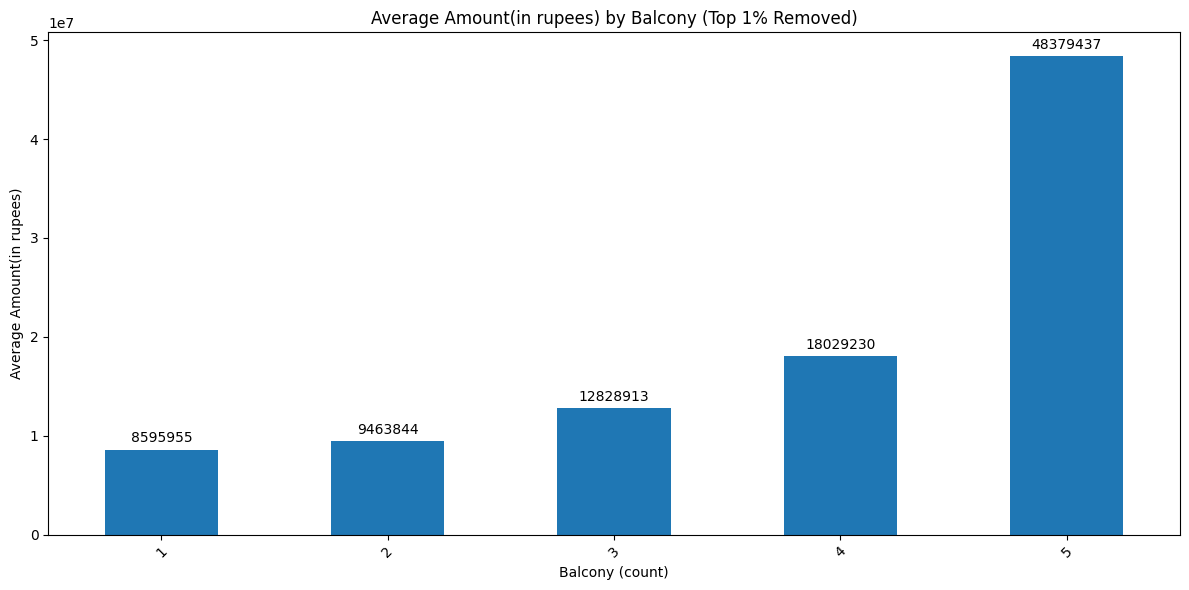

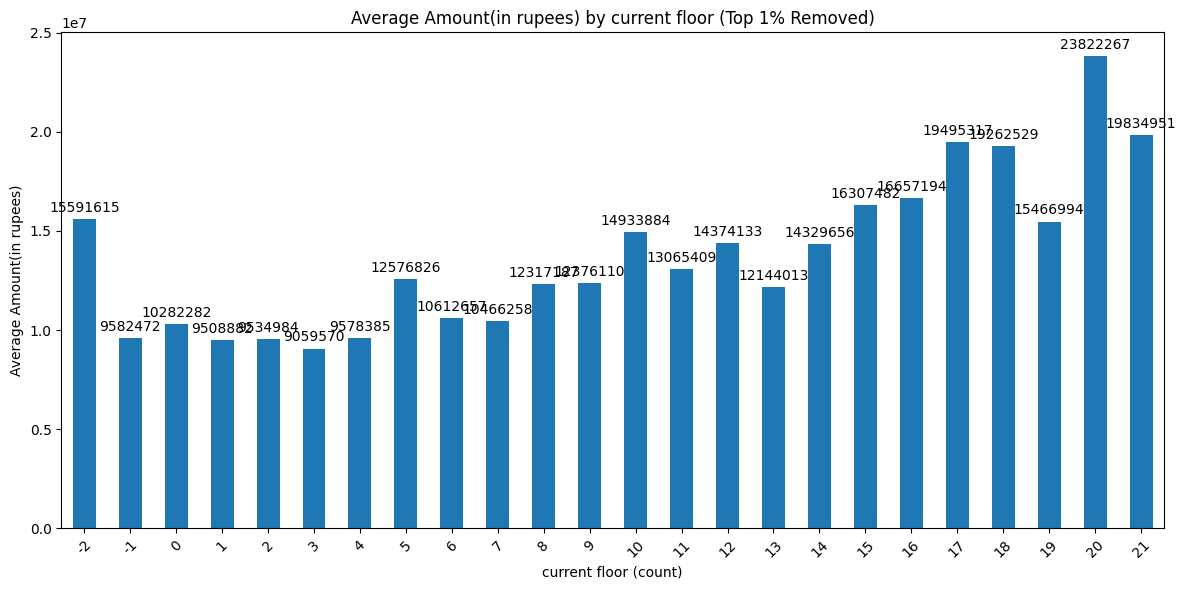

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

target_column = 'Amount(in rupees)'
features = ['Price (in rupees)', 'Total Area', 'Bathroom', 'Balcony', 'current floor']

# Features to treat as integer buckets
integer_bucket_features = ['Bathroom', 'Balcony', 'current floor']

for column in features:
    plt.figure(figsize=(12, 6))

    # Drop missing values and remove top 1% outliers
    filtered = df[[column, target_column]].dropna()
    threshold = filtered[column].quantile(0.99)
    filtered = filtered[filtered[column] <= threshold]

    if column in integer_bucket_features:
        # Use integer buckets
        filtered[column] = filtered[column].astype(int)
        mean_price = filtered.groupby(column)[target_column].mean().sort_index()
        x_label = f"{column} (count)"
    else:
        # Use binned intervals
        binned = pd.cut(filtered[column], bins=10)
        mean_price = filtered.groupby(binned)[target_column].mean().sort_index()
        x_label = f"{column} (binned)"

    # Plot and add bar labels
    ax = mean_price.plot(kind='bar')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

    plt.title(f"Average {target_column} by {column} (Top 1% Removed)")
    plt.xlabel(x_label)
    plt.ylabel(f"Average {target_column}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Summary statistics for column: Amount(in rupees)
count    6.819200e+04
mean     1.073518e+07
std      6.155574e+07
min      1.000000e+05
25%      4.200000e+06
50%      6.600000e+06
75%      1.198134e+07
max      1.400300e+10
Name: Amount(in rupees), dtype: float64


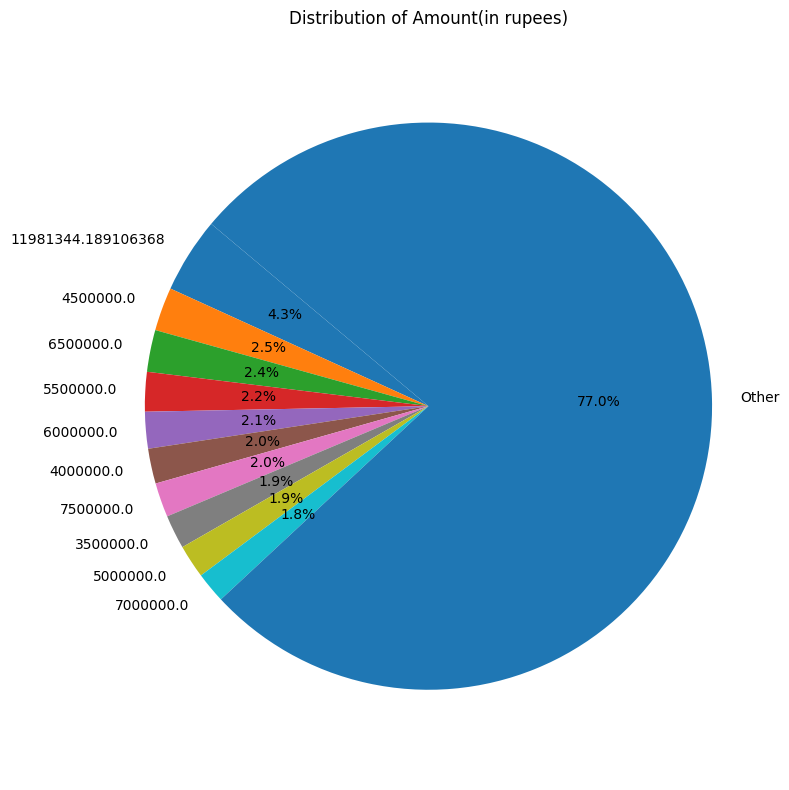

Summary statistics for column: Price (in rupees)
count    6.819200e+04
mean     6.873709e+03
std      4.257985e+04
min      0.000000e+00
25%      3.957750e+03
50%      5.357000e+03
75%      7.583772e+03
max      6.700000e+06
Name: Price (in rupees), dtype: float64


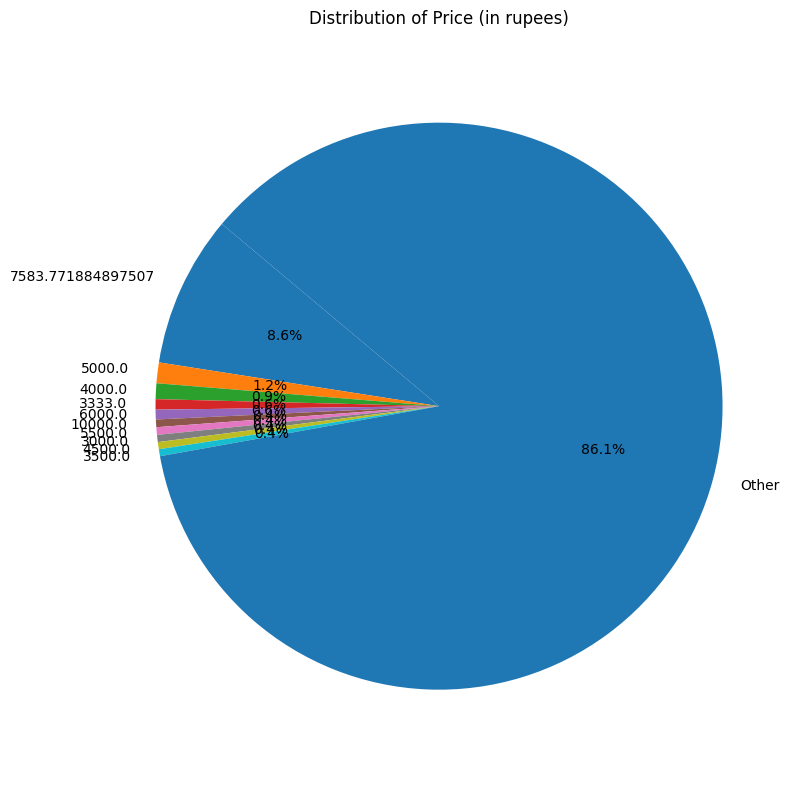

Summary statistics for column: location
count    68192.000000
mean        30.821460
std         24.479552
min          1.000000
25%          9.000000
50%         26.000000
75%         49.000000
max         81.000000
Name: location, dtype: float64


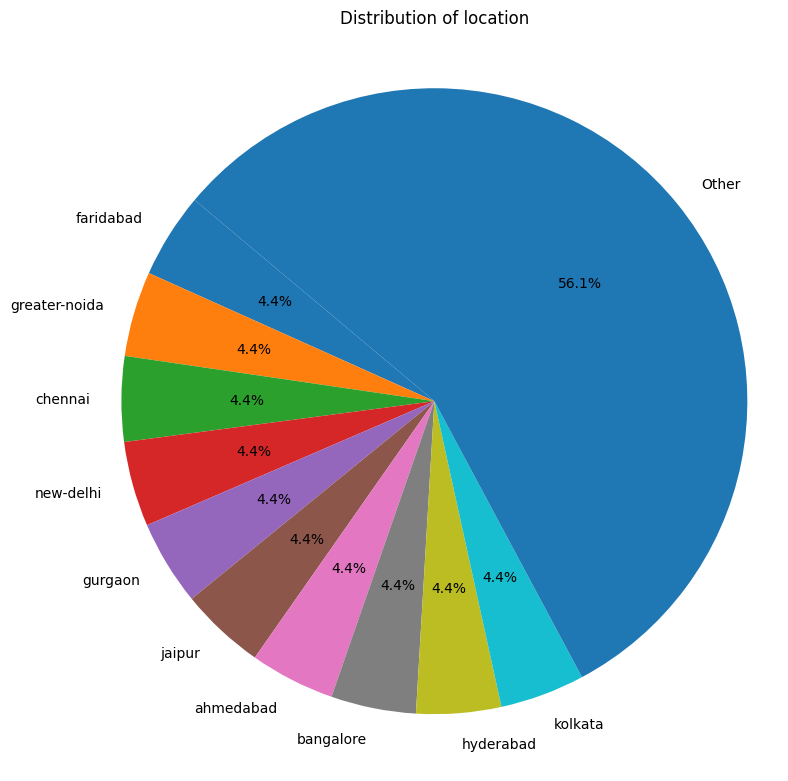

Summary statistics for column: Transaction
count    68192.000000
mean         1.257567
std          0.439505
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: Transaction, dtype: float64


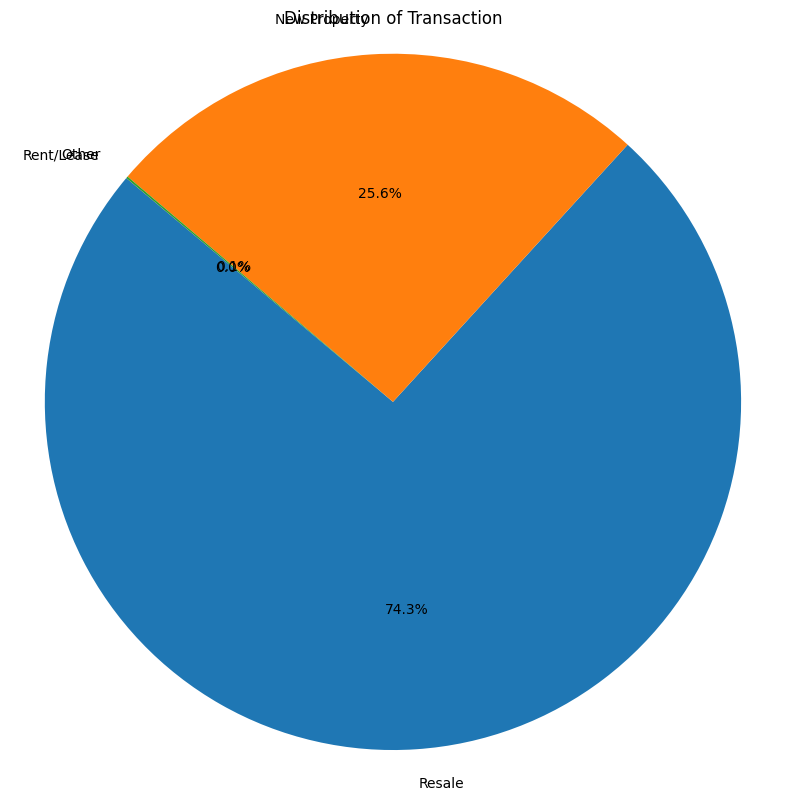

Summary statistics for column: Furnishing
count    68192.000000
mean         1.715216
std          0.686353
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Furnishing, dtype: float64


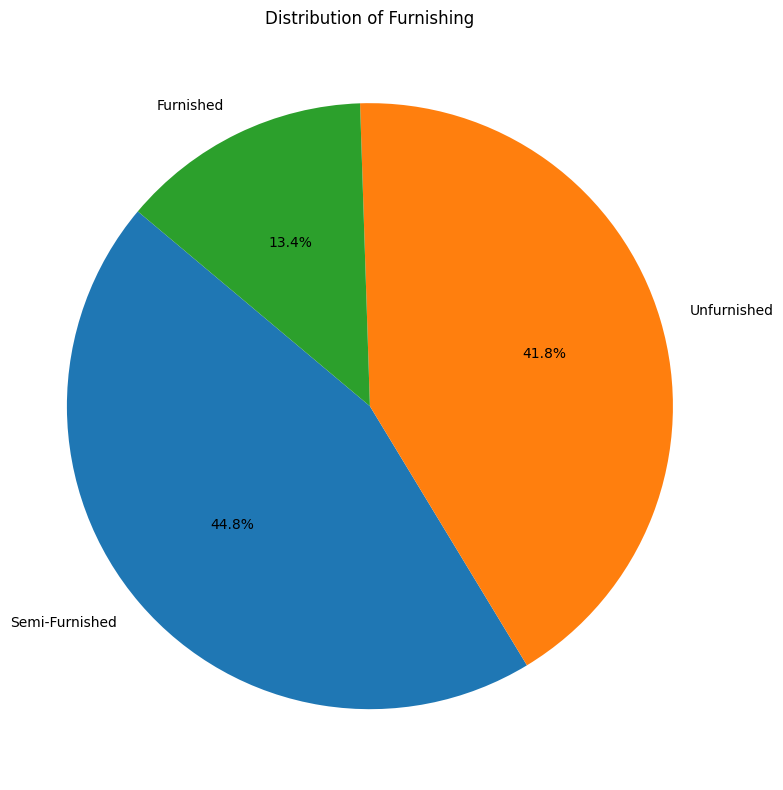

Summary statistics for column: facing
count    68192.000000
mean         1.538685
std          1.886236
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          8.000000
Name: facing, dtype: float64


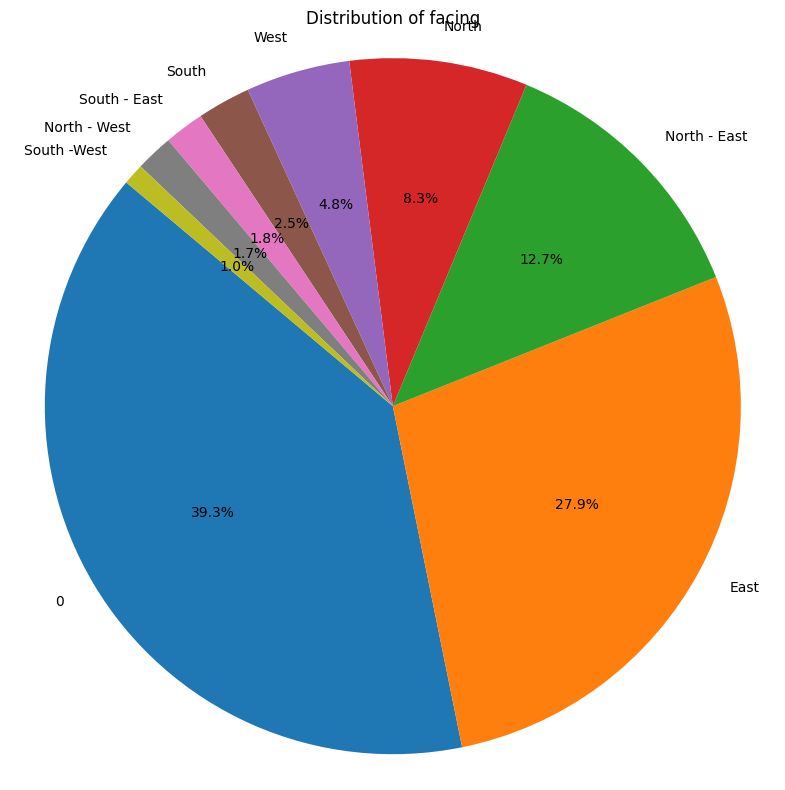

Summary statistics for column: overlooking
count    68192.000000
mean         1.498988
std          1.600573
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          7.000000
Name: overlooking, dtype: float64


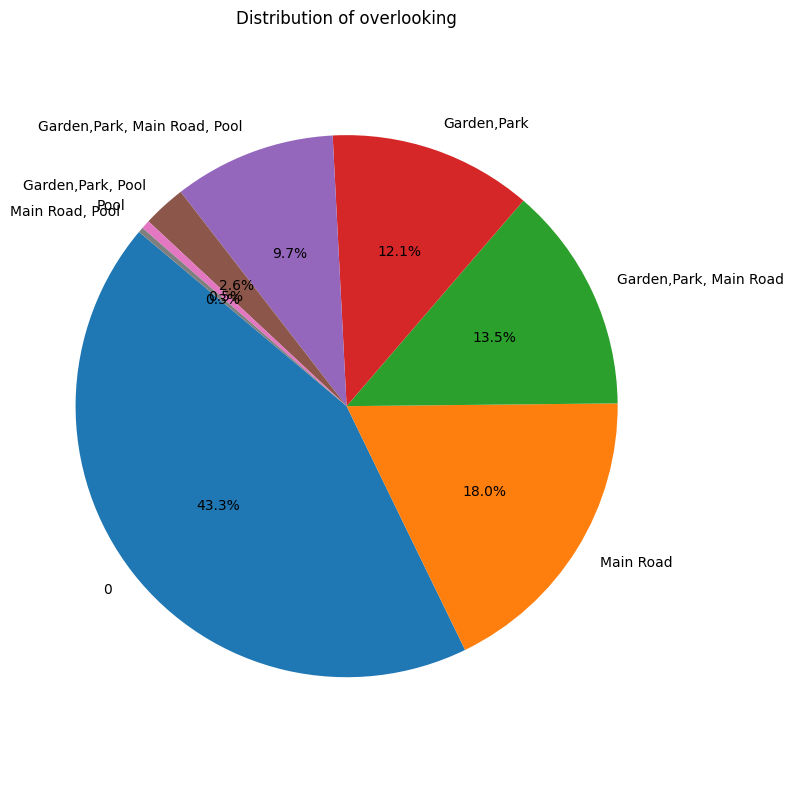

Summary statistics for column: Ownership
count    68192.000000
mean         0.818424
std          0.894910
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Ownership, dtype: float64


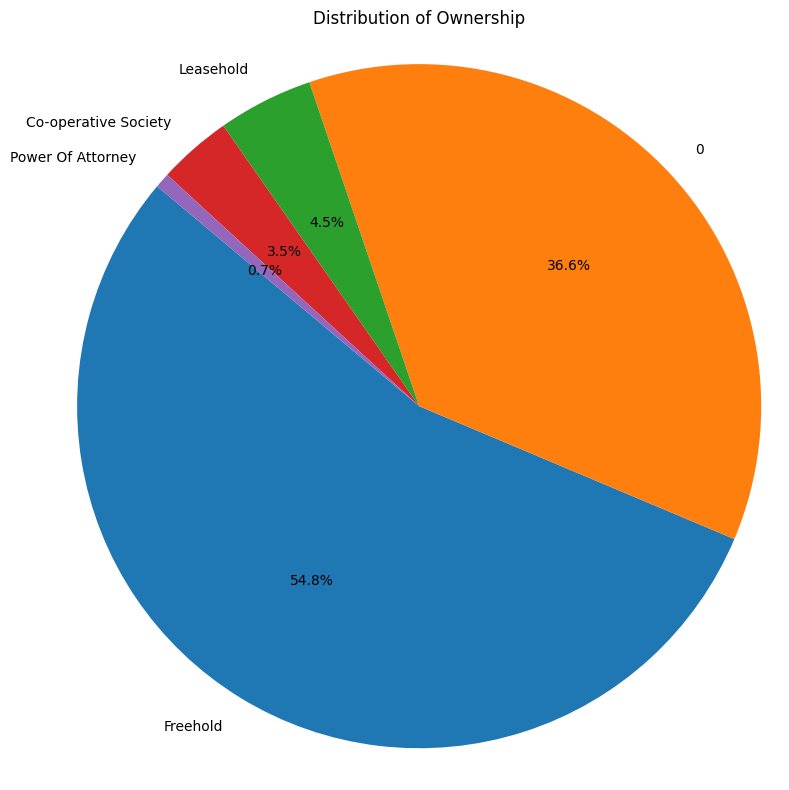

Summary statistics for column: Total Area
count    6.819200e+04
mean     2.166856e+04
std      4.877012e+06
min      0.000000e+00
25%      8.300000e+02
50%      1.130000e+03
75%      1.515250e+03
max      1.272096e+09
Name: Total Area, dtype: float64


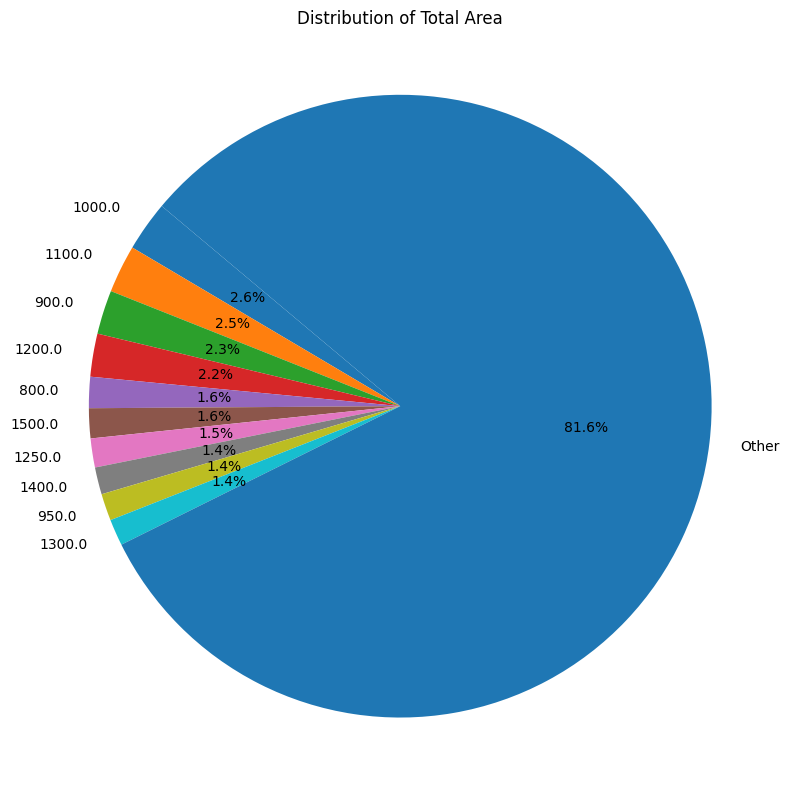

Summary statistics for column: Bathroom
count    68192.000000
mean         2.408347
std          0.897524
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: Bathroom, dtype: float64


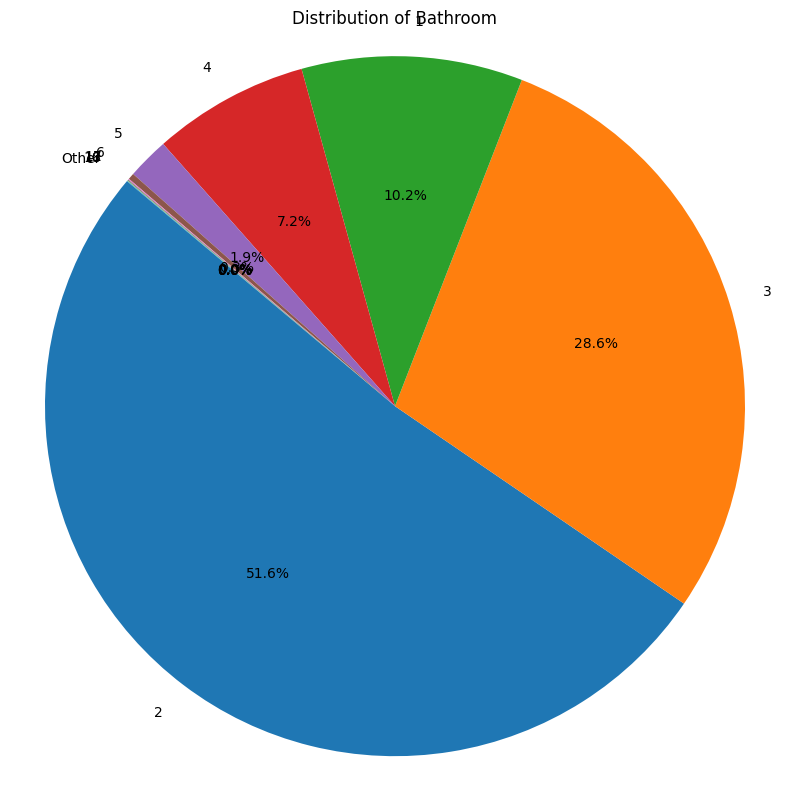

Summary statistics for column: Balcony
count    68192.000000
mean         2.062720
std          0.866681
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         11.000000
Name: Balcony, dtype: float64


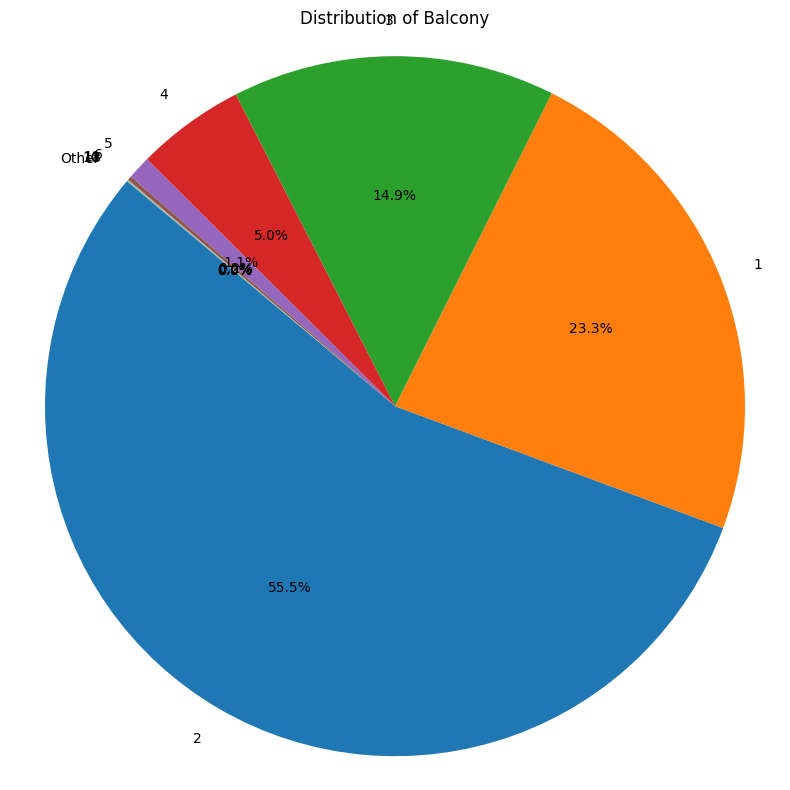

Summary statistics for column: current floor
count    68192.000000
mean         4.316393
std          4.354228
min         -2.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        200.000000
Name: current floor, dtype: float64


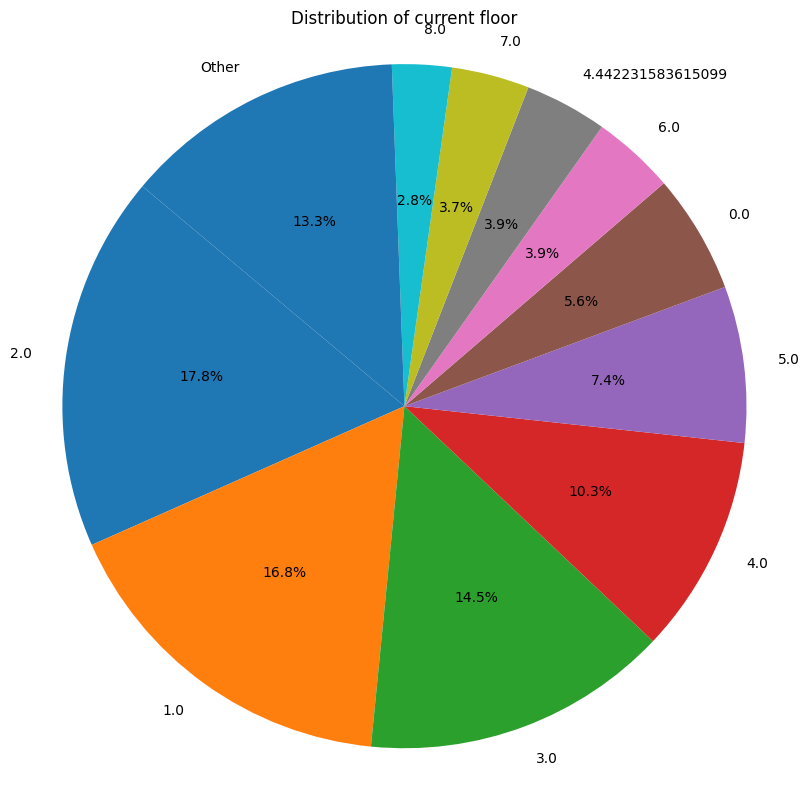

In [54]:
import matplotlib.pyplot as plt

# Reverse mappings
location_labels = {v: k for k, v in {
    'thane': 1, 'navi-mumbai': 2, 'nagpur': 3, 'mumbai': 4, 'ahmedabad': 5, 'bangalore': 6, 'chennai': 7,
    'gurgaon': 8, 'hyderabad': 9, 'indore': 10, 'jaipur': 11, 'kolkata': 12, 'lucknow': 13, 'new-delhi': 14,
    'noida': 15, 'pune': 16, 'agra': 17, 'ahmadnagar': 18, 'allahabad': 19, 'aurangabad': 20, 'badlapur': 21,
    'belgaum': 22, 'bhiwadi': 23, 'bhiwandi': 24, 'bhopal': 25, 'bhubaneswar': 26, 'chandigarh': 27,
    'coimbatore': 28, 'dehradun': 29, 'durgapur': 30, 'ernakulam': 31, 'faridabad': 32, 'ghaziabad': 33,
    'goa': 34, 'greater-noida': 35, 'guntur': 36, 'guwahati': 37, 'gwalior': 38, 'haridwar': 39, 'jabalpur': 40,
    'jamshedpur': 41, 'jodhpur': 42, 'kalyan': 43, 'kanpur': 44, 'kochi': 45, 'kozhikode': 46, 'ludhiana': 47,
    'madurai': 48, 'mangalore': 49, 'mohali': 50, 'mysore': 51, 'nashik': 52, 'navsari': 53, 'nellore': 54,
    'palakkad': 55, 'palghar': 56, 'panchkula': 57, 'patna': 58, 'pondicherry': 59, 'raipur': 60,
    'rajahmundry': 61, 'ranchi': 62, 'satara': 63, 'shimla': 64, 'siliguri': 65, 'solapur': 66, 'sonipat': 67,
    'surat': 68, 'thrissur': 69, 'tirupati': 70, 'trichy': 71, 'trivandrum': 72, 'udaipur': 73, 'udupi': 74,
    'vadodara': 75, 'vapi': 76, 'varanasi': 77, 'vijayawada': 78, 'visakhapatnam': 79, 'vrindavan': 80,
    'zirakpur': 81
}.items()}

furnishing_labels = {v: k for k, v in {'Unfurnished': 1, 'Semi-Furnished': 2, 'Furnished': 3}.items()}
transaction_labels = {v: k for k, v in {'Resale': 1, 'New Property': 2, 'Other': 3, 'Rent/Lease': 4}.items()}
ownership_labels = {v: k for k, v in {'Freehold': 1, 'Co-operative Society': 2, 'Power Of Attorney': 3, 'Leasehold': 4}.items()}
facing_labels = {v: k for k, v in {'East': 1, 'West': 2, 'North - East': 3, 'North': 4, 'North - West': 5, 'South': 6,
                                   'South -West': 7, 'South - East': 8}.items()}
overlooking_labels = {v: k for k, v in {'Garden,Park': 1, 'Garden,Park, Main Road': 2, 'Main Road': 3,
                                        'Garden,Park, Main Road, Pool': 4, 'Garden,Park, Pool': 5,
                                        'Pool': 6, 'Main Road, Pool': 7}.items()}

# Dictionary to access the correct label map per column
label_maps = {
    'location': location_labels,
    'Furnishing': furnishing_labels,
    'Transaction': transaction_labels,
    'Ownership': ownership_labels,
    'facing': facing_labels,
    'overlooking': overlooking_labels,
}

# Columns to analyze
columns = ['Amount(in rupees)', 'Price (in rupees)', 'location', 'Transaction', 'Furnishing',
           'facing', 'overlooking', 'Ownership', 'Total Area', 'Bathroom', 'Balcony', 'current floor']

for column in columns:
    print("Summary statistics for column:", column)
    print(df[column].describe())

    plt.figure(figsize=(8, 8))

    # Drop missing and get value counts
    value_counts = df[column].dropna().value_counts()

    # Top 10 values + other
    top_values = value_counts.head(10)
    other_count = value_counts.iloc[10:].sum()
    if other_count > 0:
        top_values["Other"] = other_count

    # Convert encoded values to labels if mapping exists
    if column in label_maps:
        top_values.index = [label_maps[column].get(idx, idx) if idx != "Other" else "Other" for idx in top_values.index]

    # Plot pie chart with labels
    plt.pie(top_values, labels=top_values.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Distribution of {column}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

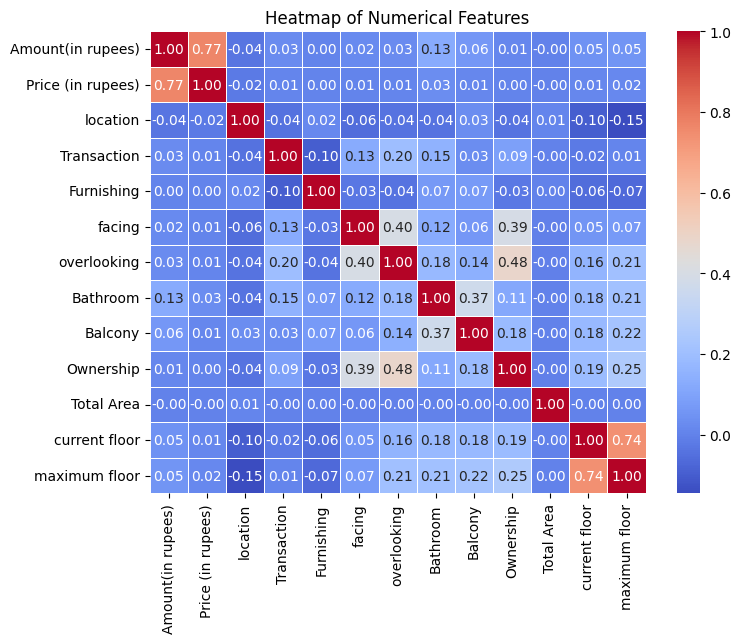

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# dftemp = df.dropna()
# Select only numerical columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Numerical Features")
plt.show()
